In [ ]:
## Business Objective:
### Creating clusters on global development measurement dataset

## Project WorkFlow:
   > 1. Import File
    >2. EDA
    >3. Visualizations
    >4. Handling Outliers
    >5. Scaling the data
    >6. Implementing PCA
    >7. Model Building using original and PCA data

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


### Import dataset

In [2]:
df=pd.read_excel('World_development_mesurement (3).xlsx')
df

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

In [3]:
global_data=df.copy()

# EDA

In [4]:
## Display column names
global_data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [5]:
## finding shape of dataset
global_data.shape

(2704, 25)

In [6]:
## Checking for duplicate values
global_data.duplicated().any()

False

In [7]:
## Checking the data types of columns
global_data.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

In [8]:
## Checking for null values
global_data.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

<Axes: >

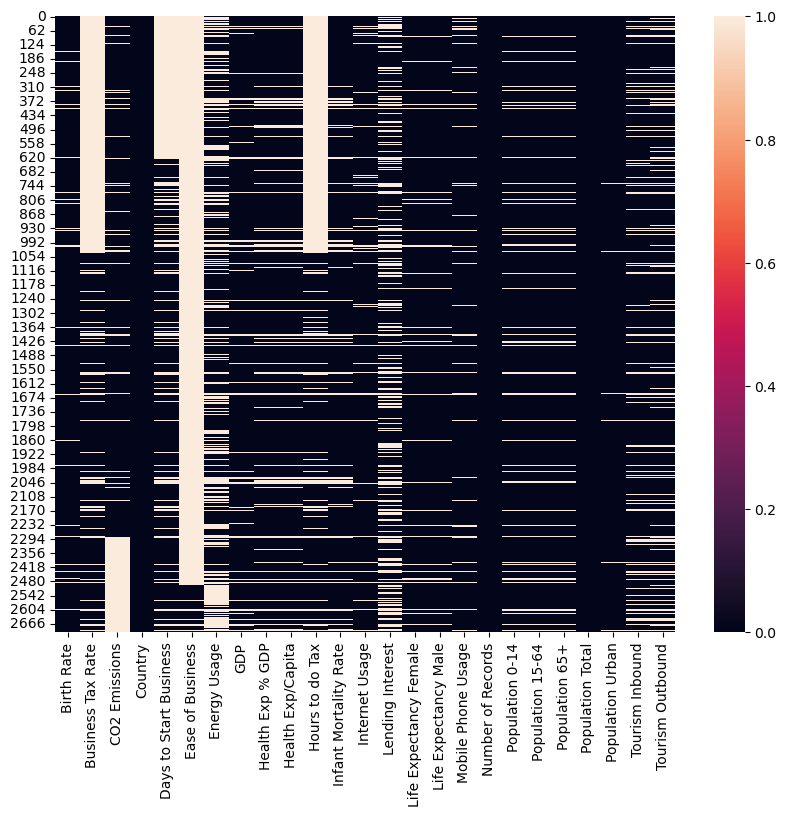

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(global_data.isnull(),cbar=True)

In [10]:
null_val_percent=global_data.isnull().mean()*100
null_val_percent.sort_values(ascending=False)

Ease of Business          93.158284
Hours to do Tax           47.633136
Business Tax Rate         47.374260
Days to Start Business    36.464497
Energy Usage              33.986686
Lending Interest          30.473373
CO2 Emissions             21.412722
Tourism Outbound          17.418639
Tourism Inbound           13.609467
Health Exp % GDP          11.427515
Health Exp/Capita         11.427515
Infant Mortality Rate      9.615385
Population 0-14            8.136095
Population 65+             8.136095
Population 15-64           8.136095
GDP                        7.766272
Internet Usage             6.397929
Mobile Phone Usage         6.176036
Life Expectancy Male       5.029586
Life Expectancy Female     5.029586
Birth Rate                 4.400888
Population Urban           0.961538
Number of Records          0.000000
Population Total           0.000000
Country                    0.000000
dtype: float64

In [11]:
#Select columns with more than 40% null values
select_columns_more_null=null_val_percent[null_val_percent>=40].index
select_columns_more_null

Index(['Business Tax Rate', 'Ease of Business', 'Hours to do Tax'], dtype='object')

In [12]:
#drop the above columns
global_data=global_data.drop(columns=['Business Tax Rate', 'Ease of Business', 'Hours to do Tax'],axis=1)

In [13]:
global_data.shape

(2704, 22)

In [14]:
## number of records for each country
global_data['Country'].value_counts()

Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: Country, Length: 208, dtype: int64

In [15]:
## Number of countries data available with us
global_data['Country'].nunique()

208

In [16]:
# Extracting object columns
object_columns=global_data.select_dtypes(include='object')
object_columns

Country                  GDP Health Exp/Capita  \
0                      Algeria      $54,790,058,957               $60   
1                       Angola       $9,129,594,819               $22   
2                        Benin       $2,359,122,303               $15   
3                     Botswana       $5,788,311,645              $152   
4                 Burkina Faso       $2,610,959,139               $12   
...                        ...                  ...               ...   
2699  Turks and Caicos Islands                  NaN               NaN   
2700             United States  $16,244,600,000,000            $8,895   
2701                   Uruguay      $50,004,354,667            $1,308   
2702             Venezuela, RB     $381,286,223,859              $593   
2703     Virgin Islands (U.S.)                  NaN               NaN   

       Tourism Inbound  Tourism Outbound  
0         $102,000,000      $193,000,000  
1          $34,000,000      $146,000,000  
2          $77,000,000       $50,000,000  
3         $227,000,000      $209,000,000  
4          $23,000,000       $30,000,000  
...                ...               ...  
2699               NaN               NaN  
2700  $200,092,000,000  $126,573,000,000  
2701    $2,222,000,000    $1,028,000,000  
2702      $904,000,000    $3,202,000,000  
2703               NaN               NaN  

[2704 rows x 5 columns]

In [17]:
## Removing $ and , from the columns and converting columns to float
columns_to_change=['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']
for col in columns_to_change:
    global_data[col]=global_data[col].str.replace('$','').str.replace(',','')
    global_data[col]=global_data[col].astype(float)
    
global_data

C:\Users\Srinivasa\AppData\Local\Temp\ipykernel_19420\257774340.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  global_data[col]=global_data[col].str.replace('$','').str.replace(',','')


Birth Rate  CO2 Emissions                   Country  \
0          0.020        87931.0                   Algeria   
1          0.050         9542.0                    Angola   
2          0.043         1617.0                     Benin   
3          0.027         4276.0                  Botswana   
4          0.046         1041.0              Burkina Faso   
...          ...            ...                       ...   
2699         NaN            NaN  Turks and Caicos Islands   
2700       0.013            NaN             United States   
2701       0.015            NaN                   Uruguay   
2702       0.020            NaN             Venezuela, RB   
2703       0.011            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
0                        NaN       26998.0  5.479006e+10             0.035   
1                        NaN        7499.0  9.129595e+09             0.034   
2                        NaN        1983.0  2.359122e+09             0.043   
3                        NaN        1836.0  5.788312e+09             0.047   
4                        NaN           NaN  2.610959e+09             0.051   
...                      ...           ...           ...               ...   
2699                     NaN           NaN           NaN               NaN   
2700                     5.0     2132446.0  1.624460e+13             0.179   
2701                     7.0           NaN  5.000435e+10             0.089   
2702                   144.0           NaN  3.812862e+11             0.046   
2703                     NaN           NaN           NaN               NaN   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  ...  \
0                  60.0                  0.034             0.0  ...   
1                  22.0                  0.128             0.0  ...   
2                  15.0                  0.090             0.0  ...   
3                 152.0                  0.054             0.0  ...   
4                  12.0                  0.096             0.0  ...   
...                 ...                    ...             ...  ...   
2699                NaN                    NaN             NaN  ...   
2700             8895.0                  0.006             0.8  ...   
2701             1308.0                  0.010             0.5  ...   
2702              593.0                  0.013             0.5  ...   
2703                NaN                    NaN             0.4  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
2700            0.196             0.66

In [18]:
## Removing '%' from Business tax Rate column and converting column to float 
#global_data['Business Tax Rate']=global_data['Business Tax Rate'].str.replace('%','')
#global_data['Business Tax Rate']=global_data['Business Tax Rate'].astype(float)
#global_data

In [19]:
global_data.dtypes

Birth Rate                float64
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [20]:
## Statistical measures of data
global_data.describe().T

count          mean           std           min  \
Birth Rate              2585.0  2.271489e-02  1.133843e-02  7.000000e-03   
CO2 Emissions           2125.0  1.423071e+05  6.159288e+05  7.000000e+00   
Days to Start Business  1718.0  3.999942e+01  5.731859e+01  1.000000e+00   
Energy Usage            1785.0  7.723684e+04  2.599239e+05  8.000000e+00   
GDP                     2494.0  2.638540e+11  1.129910e+12  6.310127e+07   
Health Exp % GDP        2395.0  6.416952e-02  2.632460e-02  8.000000e-03   
Health Exp/Capita       2395.0  8.013971e+02  1.473448e+03  2.000000e+00   
Infant Mortality Rate   2444.0  3.281301e-02  2.996760e-02  2.000000e-03   
Internet Usage          2531.0  2.397471e-01  2.601318e-01  0.000000e+00   
Lending Interest        1880.0  1.481027e-01  1.718291e-01  5.000000e-03   
Life Expectancy Female  2568.0  7.115927e+01  1.070826e+01  3.900000e+01   
Life Expectancy Male    2568.0  6.646184e+01  9.390217e+00  3.700000e+01   
Mobile Phone Usage      2537.0  5.781238e-01  4.746474e-01  0.000000e+00   
Number of Records       2704.0  1.000000e+00  0.000000e+00  1.000000e+00   
Population 0-14         2484.0  3.030511e-01  1.065769e-01  1.180000e-01   
Population 15-64        2484.0  6.234815e-01  6.966025e-02  4.740000e-01   
Population 65+          2484.0  7.346457e-02  4.954133e-02  3.000000e-03   
Population Total        2704.0  3.145729e+07  1.242894e+08  1.887600e+04   
Population Urban        2678.0  5.629526e-01  2.458972e-01  8.200000e-02   
Tourism Inbound         2336.0  4.939320e+09  1.385098e+10  7.000000e+05   
Tourism Outbound        2233.0  4.729435e+09  1.326774e+10  2.000000e+05   

                                 25%           50%           75%           max  
Birth Rate              1.300000e-02  2.000000e-02  3.100000e-02  5.300000e-02  
CO2 Emissions           1.360000e+03  8.529000e+03  5.910800e+04  8.286892e+06  
Days to Start Business  1.300000e+01  2.600000e+01  4.500000e+01  6.940000e+02  
Energy Usage            3.737000e+03  1.433800e+04  4.185200e+04  2.727728e+06  
GDP                     3.539042e+09  1.507975e+10  1.102047e+11  1.624460e+13  
Health Exp % GDP        4.600000e-02  6.100000e-02  7.900000e-02  2.250000e-01  
Health Exp/Capita       5.000000e+01  1.930000e+02  6.650000e+02  9.908000e+03  
Infant Mortality Rate   9.000000e-03  2.000000e-02  5.300000e-02  1.410000e-01  
Internet Usage          0.000000e+00  1.000000e-01  4.000000e-01  1.000000e+00  
Lending Interest        8.000000e-02  1.200000e-01  1.730000e-01  4.965000e+00  
Life Expectancy Female  6.400000e+01  7.500000e+01  7.900000e+01  8.700000e+01  
Life Expectancy Male    6.100000e+01  6.900000e+01  7.325000e+01  8.800000e+01  
Mobile Phone Usage      1.000000e-01  5.000000e-01  9.000000e-01  2.900000e+00  
Number of Records       1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
Population 0-14         2.047500e-01  2.995000e-01  4.020000e-01  5.000000e-01  
Population 15-64        5.590000e-01  6.425000e-01  6.760000e-01  8.580000e-01  
Population 65+          3.300000e-02  5.200000e-02  1.120000e-01  2.440000e-01  
Population Total        8.783360e+05  5.800324e+06  2.014089e+07  1.350695e+09  
Population Urban        3.560000e-01  5.600000e-01  7.650000e-01  1.000000e+00  
Tourism Inbound         1.250000e+08  6.885000e+08  3.601500e+09  2.000920e+11  
Tourism Outbound        1.100000e+08  4.560000e+08  2.842000e+09  1.265730e+11

In [21]:
#Removing Number of records column
global_data=global_data.drop('Number of Records',axis=1)
global_data

Birth Rate  CO2 Emissions                   Country  \
0          0.020        87931.0                   Algeria   
1          0.050         9542.0                    Angola   
2          0.043         1617.0                     Benin   
3          0.027         4276.0                  Botswana   
4          0.046         1041.0              Burkina Faso   
...          ...            ...                       ...   
2699         NaN            NaN  Turks and Caicos Islands   
2700       0.013            NaN             United States   
2701       0.015            NaN                   Uruguay   
2702       0.020            NaN             Venezuela, RB   
2703       0.011            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
0                        NaN       26998.0  5.479006e+10             0.035   
1                        NaN        7499.0  9.129595e+09             0.034   
2                        NaN        1983.0  2.359122e+09             0.043   
3                        NaN        1836.0  5.788312e+09             0.047   
4                        NaN           NaN  2.610959e+09             0.051   
...                      ...           ...           ...               ...   
2699                     NaN           NaN           NaN               NaN   
2700                     5.0     2132446.0  1.624460e+13             0.179   
2701                     7.0           NaN  5.000435e+10             0.089   
2702                   144.0           NaN  3.812862e+11             0.046   
2703                     NaN           NaN           NaN               NaN   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  ...  \
0                  60.0                  0.034             0.0  ...   
1                  22.0                  0.128             0.0  ...   
2                  15.0                  0.090             0.0  ...   
3                 152.0                  0.054             0.0  ...   
4                  12.0                  0.096             0.0  ...   
...                 ...                    ...             ...  ...   
2699                NaN                    NaN             NaN  ...   
2700             8895.0                  0.006             0.8  ...   
2701             1308.0                  0.010             0.5  ...   
2702              593.0                  0.013             0.5  ...   
2703                NaN                    NaN             0.4  ...   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                     NaN                   NaN                 NaN   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 NaN   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN

In [22]:
#z_scores=np.abs(zscore(global_data))
#z_scores

In [23]:
#for col in object_columns:
 #   mode_value=global_data[col].mode()[0]
  #  global_data[col]=global_data[col].fillna(mode_value)

In [24]:
float_columns=global_data.select_dtypes(include=['float','int'])
float_columns

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0          0.020        87931.0                     NaN       26998.0   
1          0.050         9542.0                     NaN        7499.0   
2          0.043         1617.0                     NaN        1983.0   
3          0.027         4276.0                     NaN        1836.0   
4          0.046         1041.0                     NaN           NaN   
...          ...            ...                     ...           ...   
2699         NaN            NaN                     NaN           NaN   
2700       0.013            NaN                     5.0     2132446.0   
2701       0.015            NaN                     7.0           NaN   
2702       0.020            NaN                   144.0           NaN   
2703       0.011            NaN                     NaN           NaN   

               GDP  Health Exp % GDP  Health Exp/Capita  \
0     5.479006e+10             0.035               60.0   
1     9.129595e+09             0.034               22.0   
2     2.359122e+09             0.043               15.0   
3     5.788312e+09             0.047              152.0   
4     2.610959e+09             0.051               12.0   
...            ...               ...                ...   
2699           NaN               NaN                NaN   
2700  1.624460e+13             0.179             8895.0   
2701  5.000435e+10             0.089             1308.0   
2702  3.812862e+11             0.046              593.0   
2703           NaN               NaN                NaN   

      Infant Mortality Rate  Internet Usage  Lending Interest  \
0                     0.034             0.0             0.100   
1                     0.128             0.0             1.032   
2                     0.090             0.0               NaN   
3                     0.054             0.0             0.155   
4                     0.096             0.0               NaN   
...                     ...             ...               ...   
2699                    NaN             NaN               NaN   
2700                  0.006             0.8             0.033   
2701                  0.010             0.5             0.112   
2702                  0.013             0.5             0.164   
2703                    NaN             0.4               NaN   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                     NaN                   NaN                 NaN   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 NaN   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
2700            0.196             0.667           0.136         313873685   
2701            0.220             0.639           0.140  

In [25]:
for col in float_columns:
    mean_value=global_data[col].mean()
    global_data[col]=global_data[col].fillna(mean_value)

global_data

Birth Rate  CO2 Emissions                   Country  \
0       0.020000   87931.000000                   Algeria   
1       0.050000    9542.000000                    Angola   
2       0.043000    1617.000000                     Benin   
3       0.027000    4276.000000                  Botswana   
4       0.046000    1041.000000              Burkina Faso   
...          ...            ...                       ...   
2699    0.022715  142307.107765  Turks and Caicos Islands   
2700    0.013000  142307.107765             United States   
2701    0.015000  142307.107765                   Uruguay   
2702    0.020000  142307.107765             Venezuela, RB   
2703    0.011000  142307.107765     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
0                  39.999418  2.699800e+04  5.479006e+10           0.03500   
1                  39.999418  7.499000e+03  9.129595e+09           0.03400   
2                  39.999418  1.983000e+03  2.359122e+09           0.04300   
3                  39.999418  1.836000e+03  5.788312e+09           0.04700   
4                  39.999418  7.723684e+04  2.610959e+09           0.05100   
...                      ...           ...           ...               ...   
2699               39.999418  7.723684e+04  2.638540e+11           0.06417   
2700                5.000000  2.132446e+06  1.624460e+13           0.17900   
2701                7.000000  7.723684e+04  5.000435e+10           0.08900   
2702              144.000000  7.723684e+04  3.812862e+11           0.04600   
2703               39.999418  7.723684e+04  2.638540e+11           0.06417   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  ...  \
0             60.000000               0.034000        0.000000  ...   
1             22.000000               0.128000        0.000000  ...   
2             15.000000               0.090000        0.000000  ...   
3            152.000000               0.054000        0.000000  ...   
4             12.000000               0.096000        0.000000  ...   
...                 ...                    ...             ...  ...   
2699         801.397077               0.032813        0.239747  ...   
2700        8895.000000               0.006000        0.800000  ...   
2701        1308.000000               0.010000        0.500000  ...   
2702         593.000000               0.013000        0.500000  ...   
2703         801.397077               0.032813        0.400000  ...   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                  71.000000             67.000000            0.000000   
1                  47.000000             44.000000            0.000000   
2                  57.000000             53.000000            0.000000   
3                  52.000000             49.000000            0.100000   
4                  52.000000             49.000000            0.000000   
...                      ...                   ...                 ...   
2699               71.159268             66.461838            0.578124   
2700               81.000000             76.000000            1.000000   
2701               80.000000             74.000000            1.500000   
2702               78.000000             72.000000            1.000000   
2703               83.000000             76.000000            0.578124   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0            0.342000          0.619000        0.039000          31719449   
1            0.476000          0.499000        0.025000          13924930   
2            0.454000          0.517000        0.029000           6949366   
3            0.383000          0.587000        0.029000           1755375   
4            0.468000          0.505000        0.028000          11607944   
...               ...               ...             ...               ...   
2699         0.303051          0.623481        0.073465

In [26]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2704 non-null   float64
 1   CO2 Emissions           2704 non-null   float64
 2   Country                 2704 non-null   object 
 3   Days to Start Business  2704 non-null   float64
 4   Energy Usage            2704 non-null   float64
 5   GDP                     2704 non-null   float64
 6   Health Exp % GDP        2704 non-null   float64
 7   Health Exp/Capita       2704 non-null   float64
 8   Infant Mortality Rate   2704 non-null   float64
 9   Internet Usage          2704 non-null   float64
 10  Lending Interest        2704 non-null   float64
 11  Life Expectancy Female  2704 non-null   float64
 12  Life Expectancy Male    2704 non-null   float64
 13  Mobile Phone Usage      2704 non-null   float64
 14  Population 0-14         2704 non-null   

In [27]:
global_data.shape

(2704, 21)

# Visualizations

### **Distributon Plots**

C:\Users\Srinivasa\AppData\Local\Temp\ipykernel_19420\2256747723.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(global_data['Birth Rate'],ax=axes[0,0],color='Purple')
C:\Users\Srinivasa\AppData\Local\Temp\ipykernel_19420\2256747723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(global_

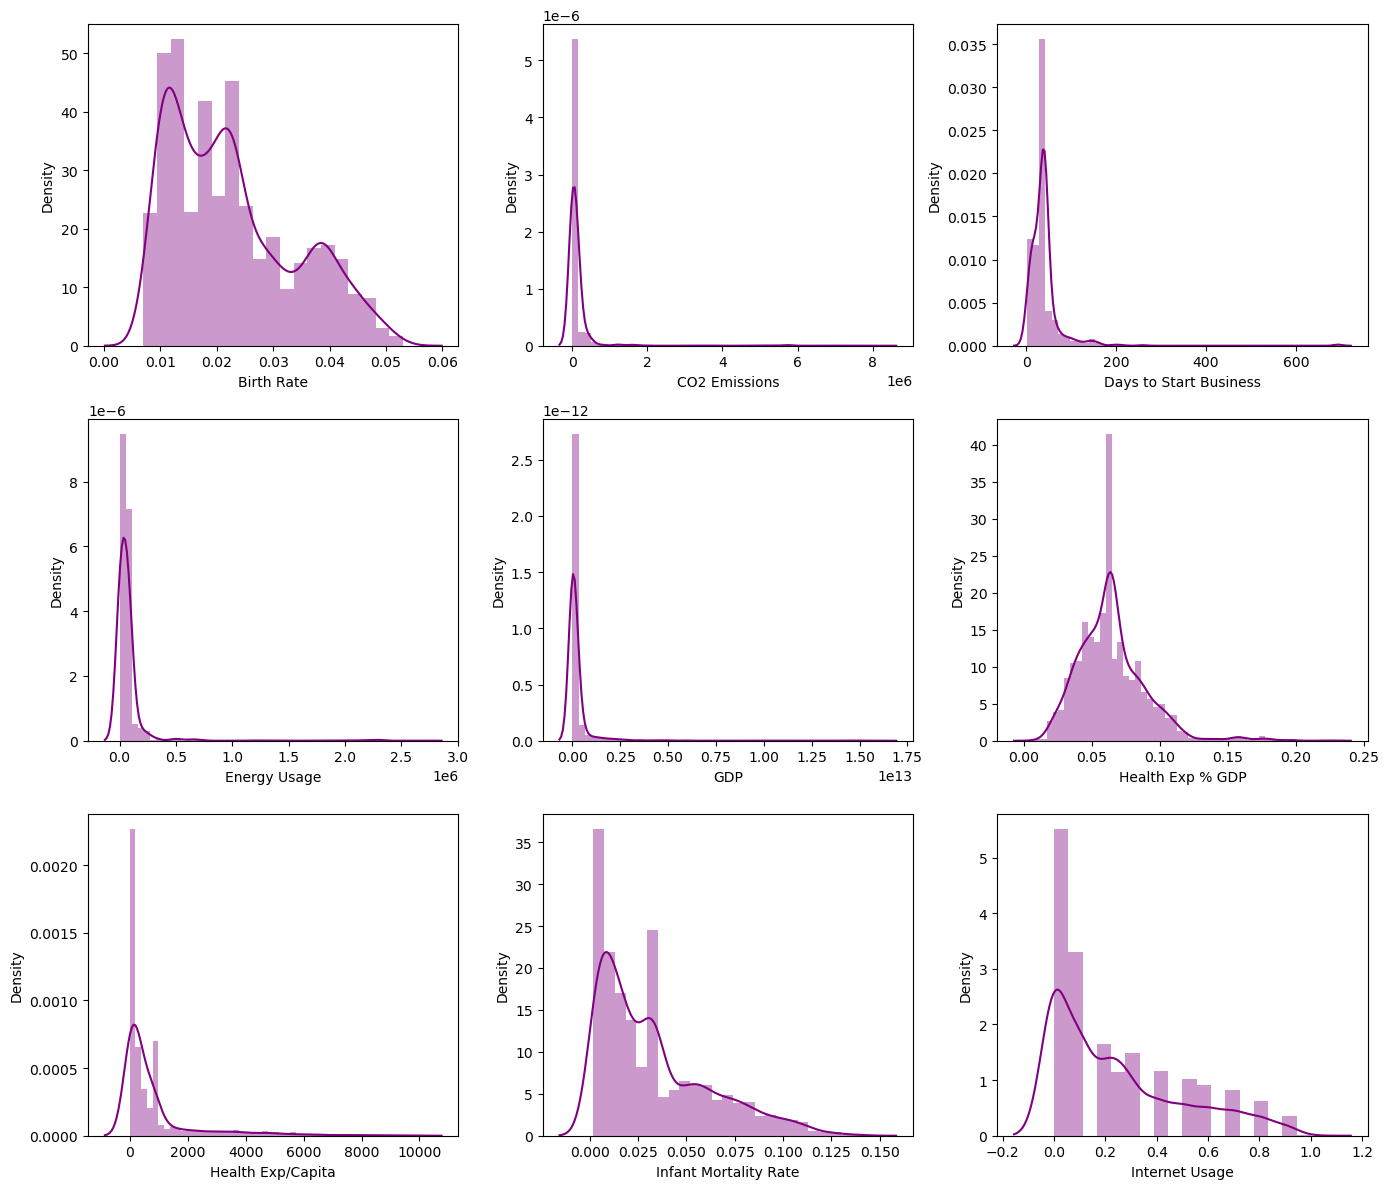

In [28]:
## Distribution plots for all columns
fig, axes=plt.subplots(3,3,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(global_data['Birth Rate'],ax=axes[0,0],color='Purple')
#sns.distplot(global_data['Business Tax Rate'],ax=axes[0,1],color='Purple')
sns.distplot(global_data['CO2 Emissions'],ax=axes[0,1],color='Purple')
sns.distplot(global_data['Days to Start Business'],ax=axes[0,2],color='Purple')
#sns.distplot(global_data['Ease of Business'],ax=axes[0,3],color='Purple')
sns.distplot(global_data['Energy Usage'],ax=axes[1,0],color='Purple')
sns.distplot(global_data['GDP'],ax=axes[1,1],color='Purple')
sns.distplot(global_data['Health Exp % GDP'],ax=axes[1,2],color='Purple')
sns.distplot(global_data['Health Exp/Capita'],ax=axes[2,0],color='Purple')
#sns.distplot(global_data['Hours to do Tax'],ax=axes[2,1],color='Purple')
sns.distplot(global_data['Infant Mortality Rate'],ax=axes[2,1],color='Purple')
sns.distplot(global_data['Internet Usage'],ax=axes[2,2],color='Purple')

plt.tight_layout()


C:\Users\Srinivasa\AppData\Local\Temp\ipykernel_19420\239402196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(global_data['Lending Interest'],ax=axes[0,0],color='Purple')
C:\Users\Srinivasa\AppData\Local\Temp\ipykernel_19420\239402196.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glo

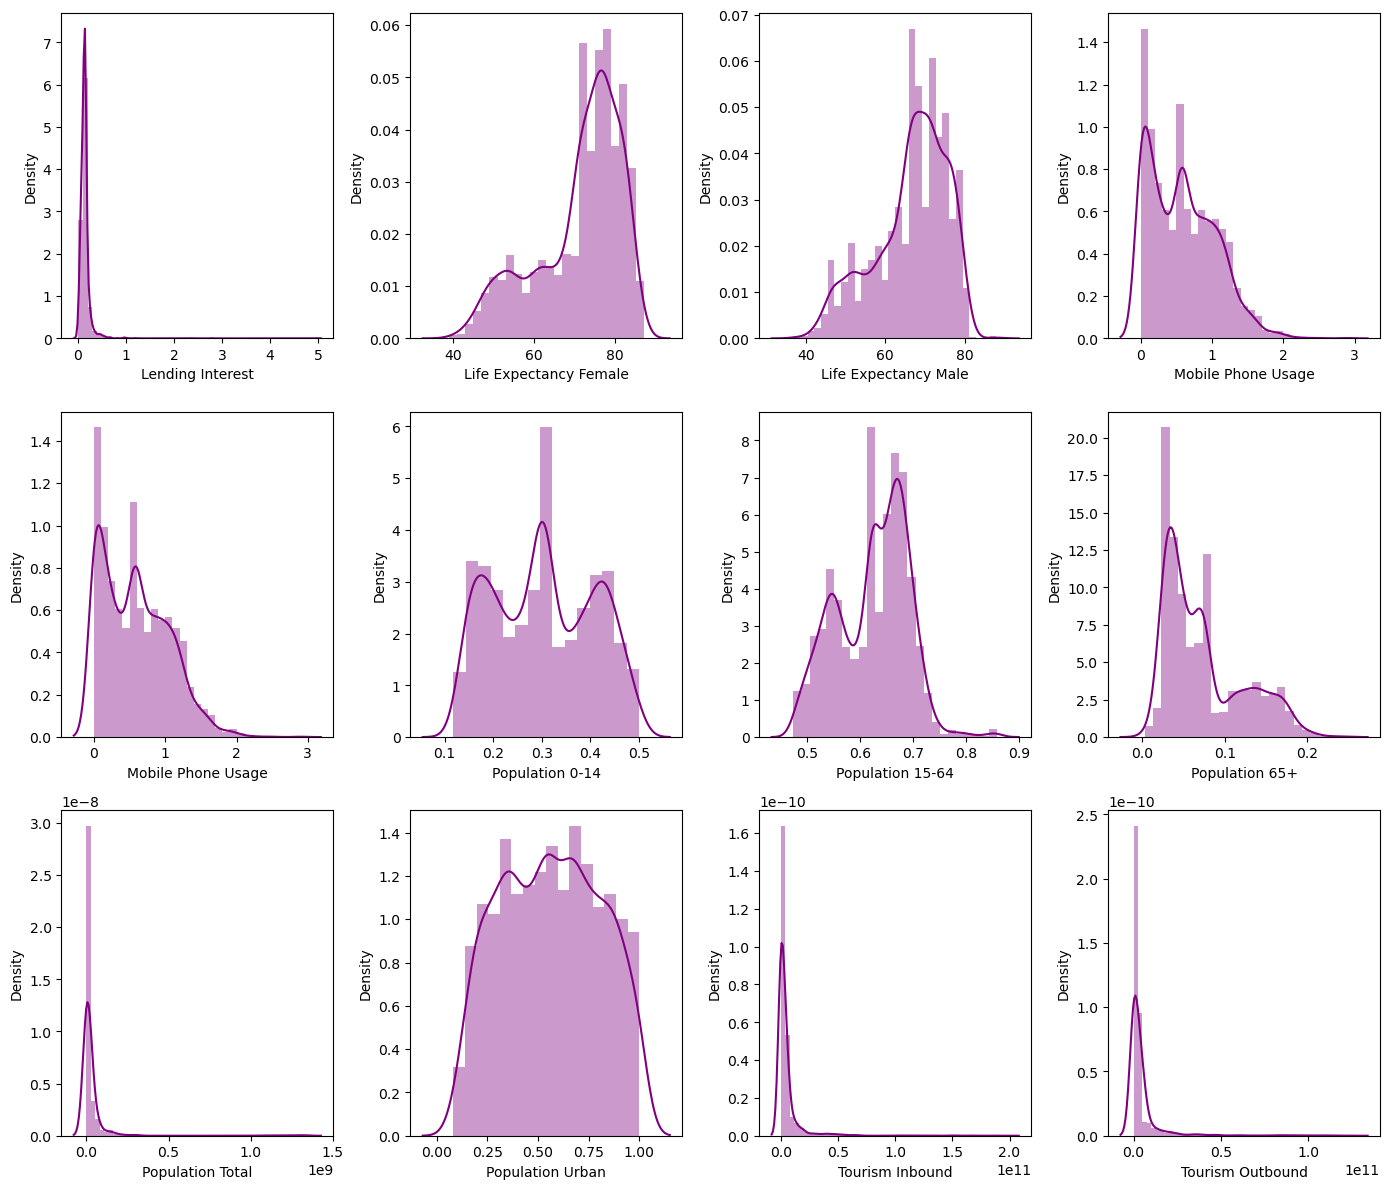

In [29]:
fig, axes=plt.subplots(3,4,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(global_data['Lending Interest'],ax=axes[0,0],color='Purple')
sns.distplot(global_data['Life Expectancy Female'],ax=axes[0,1],color='Purple')
sns.distplot(global_data['Life Expectancy Male'],ax=axes[0,2],color='Purple')
sns.distplot(global_data['Mobile Phone Usage'],ax=axes[0,3],color='Purple')
sns.distplot(global_data['Mobile Phone Usage'],ax=axes[1,0],color='Purple')
sns.distplot(global_data['Population 0-14'],ax=axes[1,1],color='Purple')
sns.distplot(global_data['Population 15-64'],ax=axes[1,2],color='Purple')
sns.distplot(global_data['Population 65+'],ax=axes[1,3],color='Purple')
sns.distplot(global_data['Population Total'],ax=axes[2,0],color='Purple')
sns.distplot(global_data['Population Urban'],ax=axes[2,1],color='Purple')
sns.distplot(global_data['Tourism Inbound'],ax=axes[2,2],color='Purple')
sns.distplot(global_data['Tourism Outbound'],ax=axes[2,3],color='Purple')
plt.tight_layout()

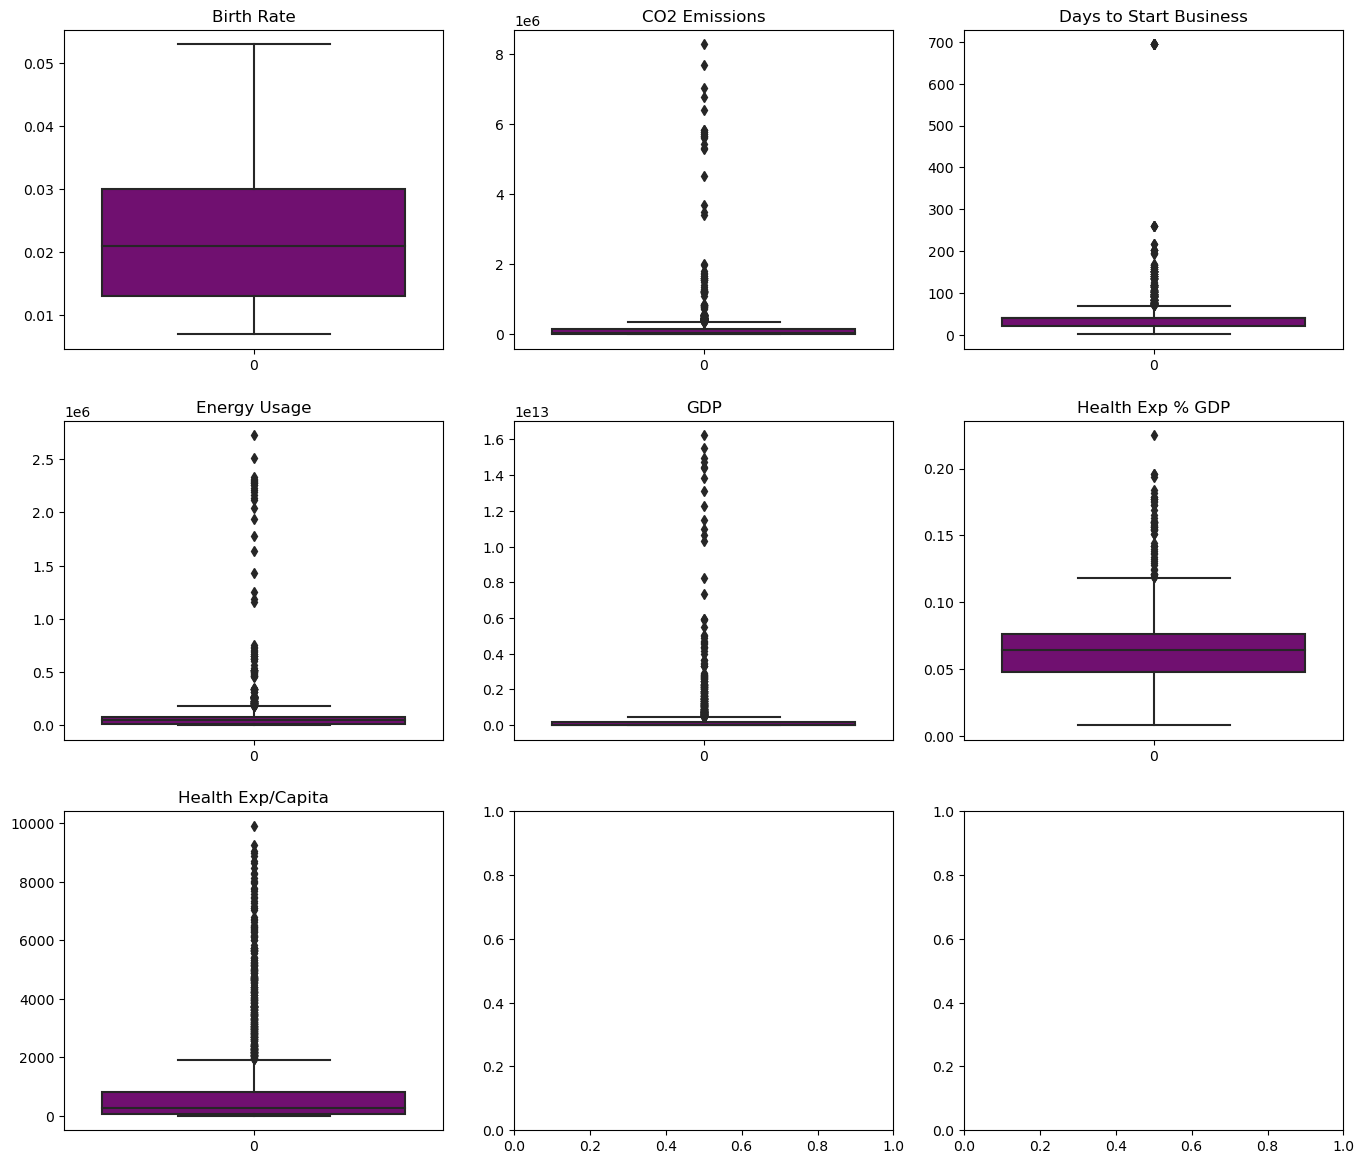

In [30]:
#Outlier Detection
## Check outliers present in data1
fig, axes=plt.subplots(3,3,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(global_data['Birth Rate'],ax=axes[0,0],color='purple')
axes[0,0].set_title('Birth Rate')
#sns.boxplot(global_data['Business Tax Rate'],ax=axes[0,1],color='green')
#axes[0,1].set_title('Business Tax Rate')
sns.boxplot(global_data['CO2 Emissions'],ax=axes[0,1],color='purple')
axes[0,1].set_title('CO2 Emissions')
sns.boxplot(global_data['Days to Start Business'],ax=axes[0,2],color='purple')
axes[0,2].set_title('Days to Start Business')
#sns.boxplot(global_data['Ease of Business'],ax=axes[1,1],color='green')
#axes[1,1].set_title('Ease of Business')
sns.boxplot(global_data['Energy Usage'],ax=axes[1,0],color='purple')
axes[1,0].set_title('Energy Usage')
sns.boxplot(global_data['GDP'],ax=axes[1,1],color='purple')
axes[1,1].set_title('GDP')
sns.boxplot(global_data['Health Exp % GDP'],ax=axes[1,2],color='purple')
axes[1,2].set_title('Health Exp % GDP')
sns.boxplot(global_data['Health Exp/Capita'],ax=axes[2,0],color='purple')
axes[2,0].set_title('Health Exp/Capita')
plt.tight_layout(pad=2.0)


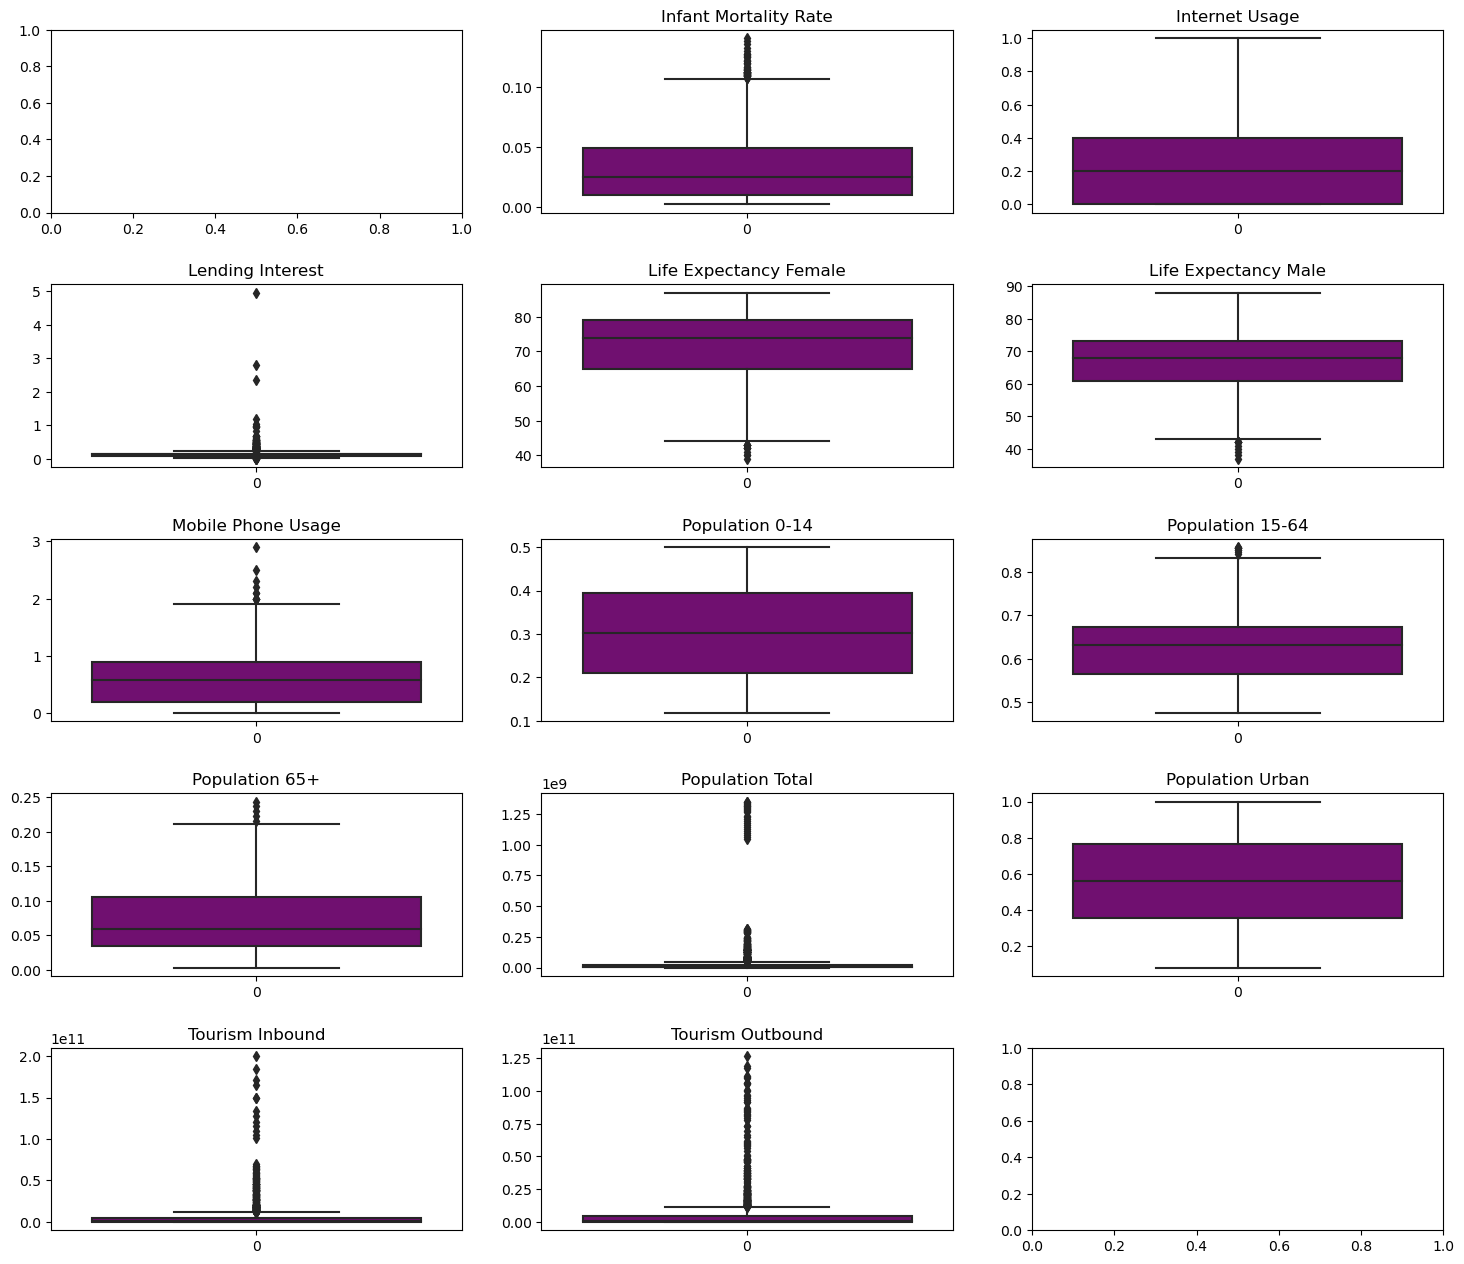

In [31]:
fig, axes=plt.subplots(5,3,figsize=(15,13),sharex=False,sharey=False)
#sns.boxplot(global_data['Hours to do Tax'],ax=axes[0,0])
#axes[0,0].set_title('Hours to do Tax')
sns.boxplot(global_data['Infant Mortality Rate'],ax=axes[0,1],color='purple')
axes[0,1].set_title('Infant Mortality Rate')
sns.boxplot(global_data['Internet Usage'],ax=axes[0,2],color='purple')
axes[0,2].set_title('Internet Usage')
sns.boxplot(global_data['Lending Interest'],ax=axes[1,0],color='purple')
axes[1,0].set_title('Lending Interest')
sns.boxplot(global_data['Life Expectancy Female'],ax=axes[1,1],color='purple')
axes[1,1].set_title('Life Expectancy Female')
sns.boxplot(global_data['Life Expectancy Male'],ax=axes[1,2],color='purple')
axes[1,2].set_title('Life Expectancy Male')
sns.boxplot(global_data['Mobile Phone Usage'],ax=axes[2,0],color='purple')
axes[2,0].set_title('Mobile Phone Usage')
sns.boxplot(global_data['Population 0-14'],ax=axes[2,1],color='purple')
axes[2,1].set_title('Population 0-14')
sns.boxplot(global_data['Population 15-64'],ax=axes[2,2],color='purple')
axes[2,2].set_title('Population 15-64')
sns.boxplot(global_data['Population 65+'],ax=axes[3,0],color='purple')
axes[3,0].set_title('Population 65+')
sns.boxplot(global_data['Population Total'],ax=axes[3,1],color='purple')
axes[3,1].set_title('Population Total')
sns.boxplot(global_data['Population Urban'],ax=axes[3,2],color='purple')
axes[3,2].set_title('Population Urban')
sns.boxplot(global_data['Tourism Inbound'],ax=axes[4,0],color='purple')
axes[4,0].set_title('Tourism Inbound')
sns.boxplot(global_data['Tourism Outbound'],ax=axes[4,1],color='purple')
axes[4,1].set_title('Tourism Outbound')
plt.tight_layout(pad=2.0)

In [32]:
## Grouping data country wise to see country wise co2 emissions
grp_country=global_data.groupby(by='Country').sum()
grp_country=grp_country.reset_index()
des_grp_Co2=grp_country.sort_values(by='CO2 Emissions',ascending=False)
des_grp_Co2

Country  Birth Rate  CO2 Emissions  Days to Start Business  \
38                   China    0.160000   6.269578e+07              521.998254   
198          United States    0.179000   6.251740e+07              174.998254   
153     Russian Federation    0.142000   1.815003e+07              413.998254   
84                   India    0.299000   1.686162e+07              581.998254   
93                   Japan    0.114000   1.361920e+07              365.998254   
..                     ...         ...            ...                     ...   
40                 Comoros    0.497000   2.858212e+05              375.997090   
120       Marshall Islands    0.332149   2.856082e+05              289.998254   
201                Vanuatu    0.379000   2.855272e+05              557.998254   
157  Sao Tome and Principe    0.480000   2.854312e+05             1230.997672   
97                Kiribati    0.325000   2.851372e+05              409.998254   

     Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
38   2.215726e+07  4.700757e+13             0.624             1717.0   
198  2.926227e+07  1.729929e+14             2.095            90576.0   
153  8.001965e+06  1.331709e+13             0.738             5343.0   
84   7.000883e+06  1.389328e+13             0.535              482.0   
93   6.504003e+06  6.233870e+13             1.117            42486.0   
..            ...           ...               ...                ...   
40   6.952856e+05  5.430213e+09             0.516              348.0   
120  6.952516e+05  1.850493e+09             2.345             6571.0   
201  6.952576e+05  6.322014e+09             0.481             1069.0   
157  6.953006e+05  1.945211e+09             1.139             1001.0   
97   6.951686e+05  1.488903e+09             1.361             1688.0   

     Infant Mortality Rate  Internet Usage  ...  Life Expectancy Female  \
38                   0.256             2.2  ...              980.000000   
198                  0.087             8.5  ...             1043.000000   
153                  0.180             2.9  ...              955.000000   
84                   0.705             0.4  ...              856.000000   
93                   0.035             8.5  ...             1113.000000   
..                     ...             ...  ...                     ...   
40                   0.882             0.3  ...              789.000000   
120                  0.423             0.4  ...              921.911215   
201                  0.225             0.8  ...              930.000000   
157                  0.609             1.7  ...              867.000000   
97                   0.649             0.6  ...              903.000000   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
38             946.000000            5.100000         2.684000   
198            977.000000            9.300000         2.654000   
153            792.000000           11.500000         2.040000   
84             817.000000            3.100000         4.134000   
93            1026.000000           10.400000         1.788000   
..                    ...                 ...              ...   
40             752.000000            3.134371         5.427000   
120            860.542056            4.046866         3.939665   
201            880.000000            3.100000         5.127000   
157            819.000000            4.356248         5.486000   
97             830.000000            0.500000         4.717000   

     Population 15-64  Population 65+  Population Total  Population Urban  \
38           9.303000        1.013000       17020440000             5.700   
198          8.702000        1.643000        3878445547            10.412   
153          9.237000        1.723000        1866571740             9.558   
84           8.244000        0.622000       14840677489             3.846   
93           8.538000        2.674000        1658333973            11.213   
..                ...    

In [33]:
top10_co2_emissions_country=des_grp_Co2.head(10)
top10_co2_emissions_country

Country  Birth Rate  CO2 Emissions  Days to Start Business  \
38                China       0.160   6.269578e+07              521.998254   
198       United States       0.179   6.251740e+07              174.998254   
153  Russian Federation       0.142   1.815003e+07              413.998254   
84                India       0.299   1.686162e+07              581.998254   
93                Japan       0.114   1.361920e+07              365.998254   
69              Germany       0.109   9.116899e+06              377.998254   
33               Canada       0.143   6.201641e+06              159.998254   
197      United Kingdom       0.160   6.095829e+06              245.998254   
99          Korea, Rep.       0.129   5.611049e+06              261.998254   
86   Iran, Islamic Rep.       0.241   5.563337e+06              336.998254   

     Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
38   2.215726e+07  4.700757e+13             0.624             1717.0   
198  2.926227e+07  1.729929e+14             2.095            90576.0   
153  8.001965e+06  1.331709e+13             0.738             5343.0   
84   7.000883e+06  1.389328e+13             0.535              482.0   
93   6.504003e+06  6.233870e+13             1.117            42486.0   
69   4.303761e+06  3.719726e+13             1.417            49522.0   
33   3.360979e+06  1.619124e+13             1.320            49730.0   
197  2.748224e+06  2.847266e+13             1.102            39763.0   
99   2.864328e+06  1.160564e+13             0.785            13957.0   
86   2.153725e+06  3.505108e+12             0.741             3450.0   

     Infant Mortality Rate  Internet Usage  ...  Life Expectancy Female  \
38                   0.256             2.2  ...                   980.0   
198                  0.087             8.5  ...                  1043.0   
153                  0.180             2.9  ...                   955.0   
84                   0.705             0.4  ...                   856.0   
93                   0.035             8.5  ...                  1113.0   
69                   0.050             8.5  ...                  1066.0   
33                   0.065             9.1  ...                  1075.0   
197                  0.064             9.0  ...                  1060.0   
99                   0.059             9.3  ...                  1069.0   
86                   0.273             1.3  ...                   955.0   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
38                  946.0                 5.1            2.684   
198                 977.0                 9.3            2.654   
153                 792.0                11.5            2.040   
84                  817.0                 3.1            4.134   
93                 1026.0                10.4            1.788   
69                  996.0                12.7            1.850   
33                 1014.0                 7.4            2.279   
197                1005.0                13.7            2.340   
99                  981.0                11.2            2.385   
86                  914.0                 4.4            3.478   

     Population 15-64  Population 65+  Population Total  Population Urban  \
38              9.303           1.013       17020440000             5.700   
198             8.702           1.643        3878445547            10.412   
153             9.237           1.723        1866571740             9.558   
84              8.244           0.622       14840677489             3.846   
93              8.538           2.674        1658333973            11.213   
69              8.664           2.485        1067225439             9.580   
33              8.979           1.747         424631743            10.446   
197             8.554           2.106         793392872            10.425   
99              9.367           1.249         630319036            10.554   
86              8.889           0.633    

Text(0.5, 1.0, 'TOP 10 HIGHEST CO2 EMISSION COUNTRIES')

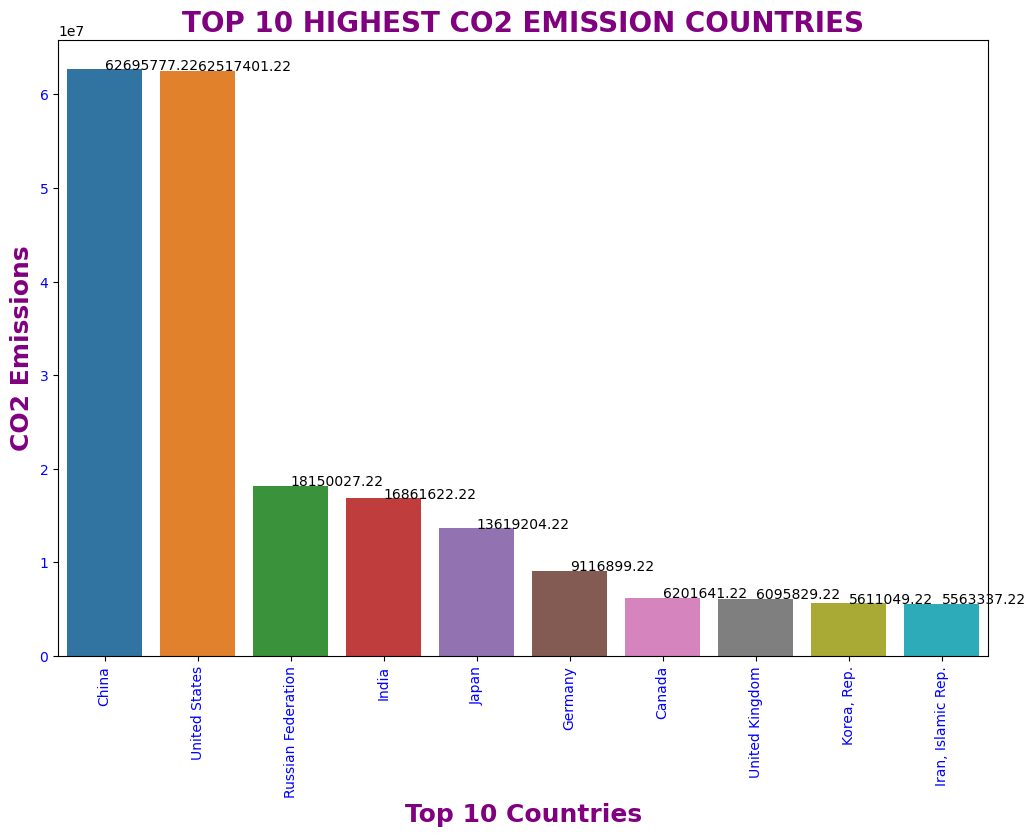

In [34]:
# Top 10 highest CO2 Emission Countries
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,8))
sns.barplot(data=top10_co2_emissions_country,x='Country',y='CO2 Emissions')
for i,value in enumerate(top10_co2_emissions_country['CO2 Emissions']):
    value=round(value,2)
    plt.text(i,value,str(value))

#plt.gcf().set_facecolor('black')
#plt.gca().set_facecolor('black')
plt.xlabel('Top 10 Countries',weight='bold',size=18,color='Purple')
plt.xticks(rotation=90,color='blue',size=10)
plt.ylabel('CO2 Emissions',weight='bold',size=18,color='Purple')
plt.yticks(color='blue',size=10)
plt.title('TOP 10 HIGHEST CO2 EMISSION COUNTRIES',color='Purple',weight='bold',size=20)   

In [35]:
#Top 10 high Birth Rate Countries
high_birthrate_countries=grp_country.sort_values(by='Birth Rate',ascending=False)[10:]
top_10_high_birthrate_countries=high_birthrate_countries.head(10)
top_10_high_birthrate_countries

Country  Birth Rate  CO2 Emissions  Days to Start Business  \
30         Burundi       0.570   2.869832e+05              244.998254   
0      Afghanistan       0.561   3.107472e+05              232.997672   
130     Mozambique       0.556   3.069602e+05              811.998254   
139        Nigeria       0.551   1.277128e+06              419.998254   
115         Malawi       0.550   2.955192e+05              516.998254   
184       Tanzania       0.539   3.397002e+05              386.998254   
162   Sierra Leone       0.531   2.914302e+05              314.998254   
32        Cameroon       0.518   3.354492e+05              459.998254   
77   Guinea-Bissau       0.518   2.868212e+05             1685.997090   
20           Benin       0.517   3.200662e+05              423.998254   

     Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
30   1.004079e+06  1.822542e+10          1.096000         172.000000   
0    1.004079e+06  3.804814e+11          1.139339        1939.794154   
130  1.813098e+05  1.004246e+11          0.799000         278.000000   
139  1.335753e+06  2.350603e+12          0.780000         751.000000   
115  1.004079e+06  4.526897e+10          0.967000         252.000000   
184  2.837468e+05  2.182796e+11          0.662000         286.000000   
162  1.004079e+06  2.568836e+10          2.033000         745.000000   
32   1.571908e+05  2.345236e+11          0.637000         601.000000   
77   6.954896e+05  8.283853e+09          0.766000         338.000000   
20   1.112528e+05  6.445873e+10          0.584000         331.000000   

     Infant Mortality Rate  Internet Usage  ...  Life Expectancy Female  \
30                   0.950        0.000000  ...                   678.0   
0                    1.076        0.439747  ...                   764.0   
130                  1.137        0.000000  ...                   643.0   
139                  1.225        1.400000  ...                   646.0   
115                  0.919        0.000000  ...                   652.0   
184                  0.724        0.000000  ...                   727.0   
162                  1.627        0.000000  ...                   556.0   
32                   0.994        0.200000  ...                   698.0   
77                   1.223        0.000000  ...                   702.0   
20                   0.949        0.000000  ...                   766.0   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
30                  641.0            0.800000            5.930   
0                   733.0            3.956248            6.374   
130                 612.0            1.700000            5.824   
139                 635.0            3.400000            5.683   
115                 651.0            1.200000            5.971   
184                 705.0            2.900000            5.816   
162                 546.0            3.334371            5.526   
32                  673.0            2.900000            5.739   
77                  670.0            4.334371            5.540   
20                  727.0            3.700000            5.754   

     Population 15-64  Population 65+  Population Total  Population Urban  \
30              6.722           0.348         105641434             1.255   
0               6.354           0.270         330190364             3.028   
130             6.762           0.417         281338192             3.927   
139             6.961           0.355        1876067490             5.198   
115             6.628           0.396         174714562             1.971   
184             6.791           0.393         524239387             3.328   
162             7.151           0.323          67155743             4.831   
32              6.833           0.429         242984998             6.383   
77              7.074           0.385          18958005             5.429   
20              6.875           0.371         110015392             5.254   

     Tourism 

Text(0.5, 1.0, 'TOP 10 HIGHEST BIRTH RATE COUNTRIES')

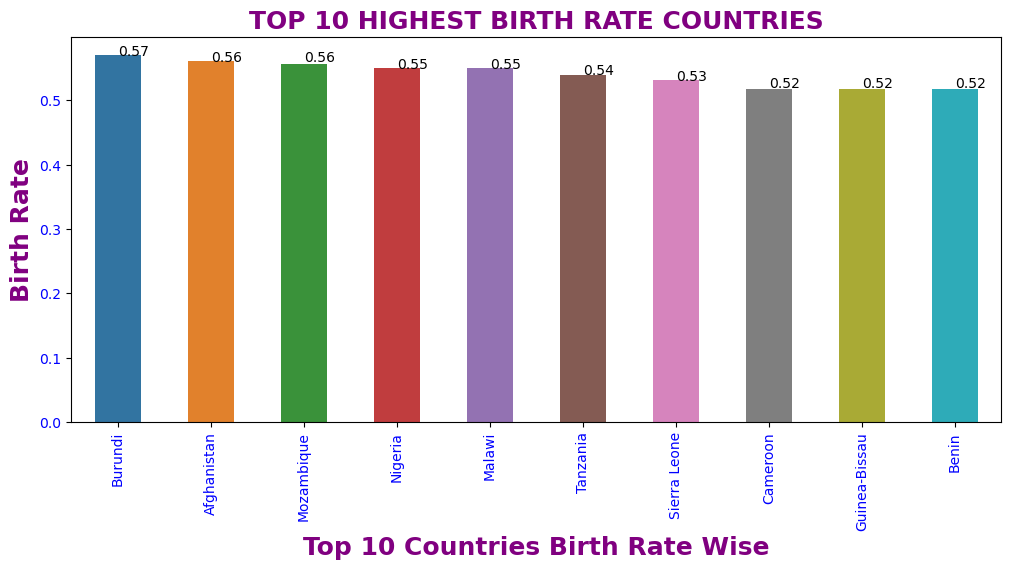

In [36]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,5))
sns.barplot(data=top_10_high_birthrate_countries,x='Country',y='Birth Rate',width=0.5)
for i,value in enumerate(top_10_high_birthrate_countries['Birth Rate']):
    value=round(value,2)
    plt.text(i,value,str(value))

#plt.gcf().set_facecolor('black')
#plt.gca().set_facecolor('black')
plt.xlabel('Top 10 Countries Birth Rate Wise',weight='bold',size=18,color='Purple')
plt.xticks(rotation=90,color='blue',size=10)
plt.ylabel('Birth Rate',weight='bold',size=18,color='Purple')
plt.yticks(color='blue',size=10)
plt.title('TOP 10 HIGHEST BIRTH RATE COUNTRIES',color='Purple',weight='bold',size=18)
#plt.tight_layout()

In [37]:
#Top 10 high Birth Rate Countries
high_tourisminbound_countries=grp_country.sort_values(by='Tourism Inbound',ascending=False)
top_5_high_tourisminbound_countries=high_tourisminbound_countries.head(5)

high_tourismoutbound_countries=grp_country.sort_values(by='Tourism Outbound',ascending=False)
top_5_high_tourismoutbound_countries=high_tourismoutbound_countries.head(5)

high_birthrate_countries=grp_country.sort_values(by='Birth Rate',ascending=False)
top_5_high_birthrate_countries=high_birthrate_countries.head(5)

#high_businesstaxrate_countries=grp_country.sort_values(by='Business Tax Rate',ascending=False)
#top_5_high_businesstaxrate_countries=high_businesstaxrate_countries.head(5)

high_CO2Emission_countries=grp_country.sort_values(by='CO2 Emissions',ascending=False)
top_5_high_CO2Emission_countries=high_CO2Emission_countries.head(5)

#high_daystostartbusiness_countries=grp_country.sort_values(by='Days to start Business',ascending=False)
#top_5_high_daystostartbusiness_countries=high_daystostartbusiness_countries.head(5)

#high_easoofbusiness_countries=grp_country.sort_values(by='Ease of Business',ascending=False)
#top_5_high_easoofbusiness_countries=high_easoofbusiness_countries.head(5)

high_EnergyUsage_countries=grp_country.sort_values(by='Energy Usage',ascending=False)
top_5_high_EnergyUsage_countries=high_EnergyUsage_countries.head(5)

high_GDP_countries=grp_country.sort_values(by='GDP',ascending=False)
top_5_high_GDP_countries=high_GDP_countries.head(5)

high_healthexpgdp_countries=grp_country.sort_values(by='Health Exp % GDP',ascending=False)
top_5_high_healthexpgdp_countries=high_healthexpgdp_countries.head(5)

high_healthexpcapita_countries=grp_country.sort_values(by='Health Exp/Capita',ascending=False)
top_5_high_healthexpcapita_countries=high_healthexpcapita_countries.head(5)

#high_hrstodotax_countries=grp_country.sort_values(by='Hours to do Tax',ascending=False)
#top_5_high_hrstodotax_countries=high_hrstodotax_countries.head(5)

high_infantmortalityrate_countries=grp_country.sort_values(by='Infant Mortality Rate',ascending=False)
top_5_high_infantmortalityrate_countries=high_infantmortalityrate_countries.head(5)

high_internetusage_countries=grp_country.sort_values(by='Internet Usage',ascending=False)
top_5_high_internetusage_countries=high_internetusage_countries.head(5)

high_lendingint_countries=grp_country.sort_values(by='Lending Interest',ascending=False)
top_5_high_lendingint_countries=high_lendingint_countries.head(5)

high_lifeexpfemale_countries=grp_country.sort_values(by='Life Expectancy Female',ascending=False)
top_5_high_lifeexpfemale_countries=high_lifeexpfemale_countries.head(5)

high_lifeexpmale_countries=grp_country.sort_values(by='Life Expectancy Male',ascending=False)
top_5_high_lifeexpmale_countries=high_lifeexpmale_countries.head(5)

high_mobileusage_countries=grp_country.sort_values(by='Mobile Phone Usage',ascending=False)
top_5_high_mobileusage_countries=high_mobileusage_countries.head(5)

#high_popurban_countries=grp_country.sort_values(by='Population Urban',ascending=False)
#top_5_high_tourismoutbound_countries=high_tourismoutbound_countries.head(5)

high_pop0_countries=grp_country.sort_values(by='Population 0-14',ascending=False)
top_5_high_pop0_countries=high_pop0_countries.head(5)

high_pop15_countries=grp_country.sort_values(by='Population 15-64',ascending=False)
top_5_high_pop15_countries=high_pop15_countries.head(5)

high_pop65_countries=grp_country.sort_values(by='Population 65+',ascending=False)
top_5_high_pop65_countries=high_pop65_countries.head(5)

high_PopulationUrban_countries=grp_country.sort_values(by='Population Urban',ascending=False)
top_5_high_PopulationUrban_countries=high_PopulationUrban_countries.head(5)

#high_tourismoutbound_countries=grp_country.sort_values(by='Tourism Outbound',ascending=False)
#top_5_high_tourismoutbound_countries=high_tourismoutbound_countries.head(5)
#top_10_high_tourisminbound_countries

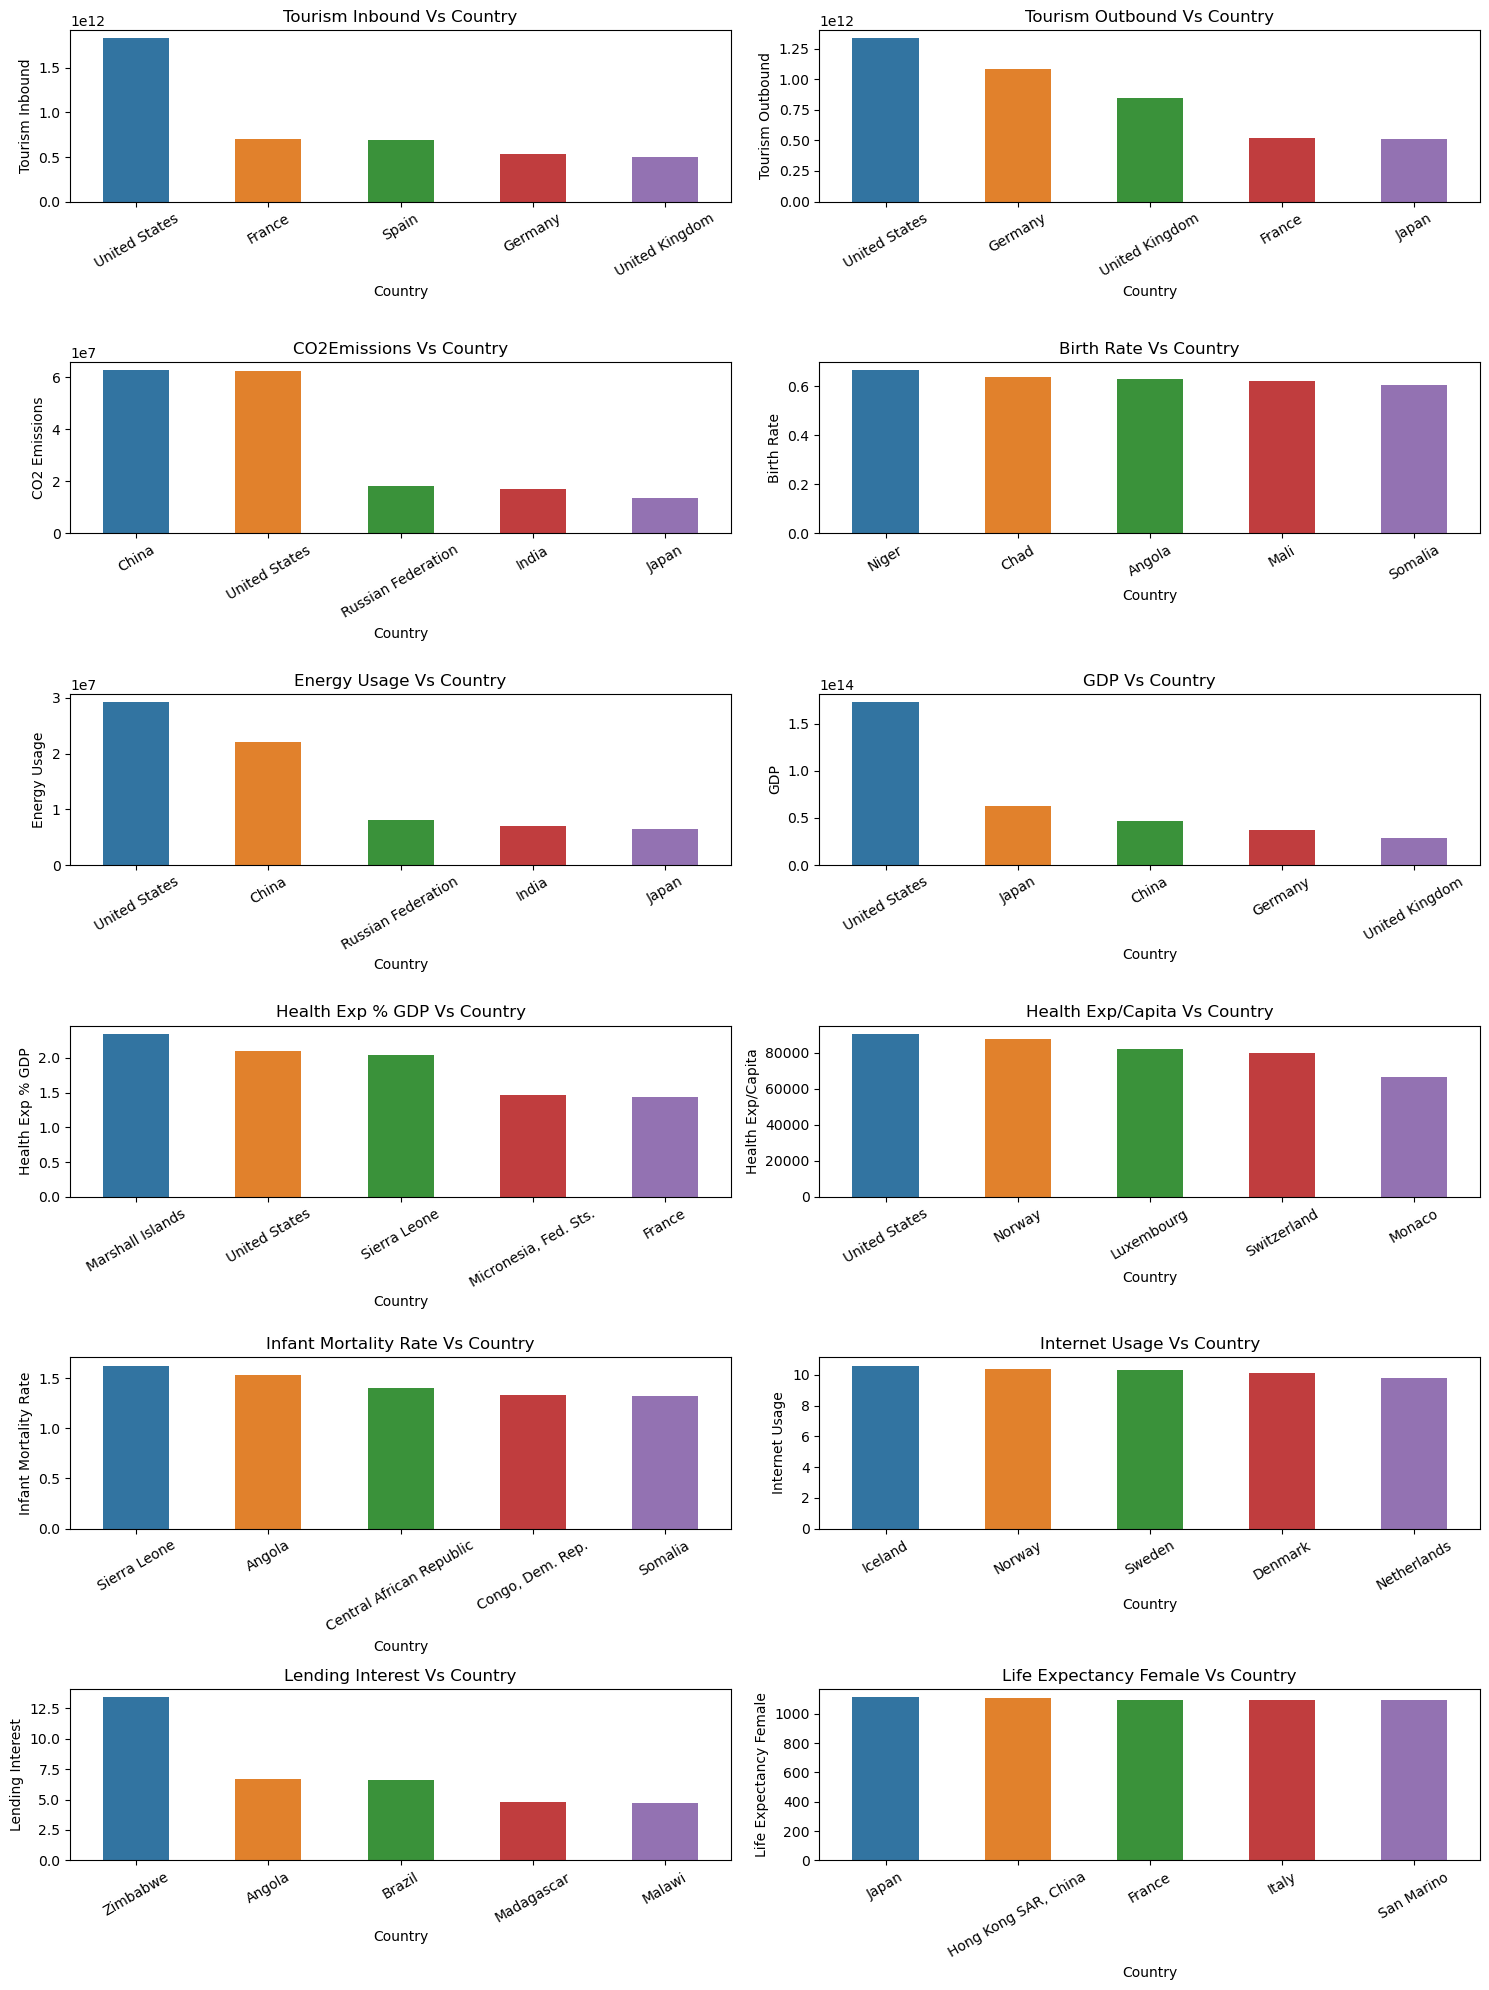

In [38]:
fig,axes=plt.subplots(6,2,figsize=(15,20))
sns.barplot(data=top_5_high_tourisminbound_countries,x='Country',y='Tourism Inbound',width=0.5,ax=axes[0,0])
axes[0,0].set_title('Tourism Inbound Vs Country')
sns.barplot(data=top_5_high_tourismoutbound_countries,x='Country',y='Tourism Outbound',width=0.5,ax=axes[0,1])
axes[0,1].set_title('Tourism Outbound Vs Country')
sns.barplot(data=top_5_high_CO2Emission_countries,x='Country',y='CO2 Emissions',width=0.5,ax=axes[1,0])
axes[1,0].set_title('CO2Emissions Vs Country')
sns.barplot(data=top_5_high_birthrate_countries,x='Country',y='Birth Rate',width=0.5,ax=axes[1,1])
axes[1,1].set_title('Birth Rate Vs Country')
sns.barplot(data=top_5_high_EnergyUsage_countries,x='Country',y='Energy Usage',width=0.5,ax=axes[2,0])
axes[2,0].set_title('Energy Usage Vs Country')
sns.barplot(data=top_5_high_GDP_countries,x='Country',y='GDP',width=0.5,ax=axes[2,1])
axes[2,1].set_title('GDP Vs Country')
sns.barplot(data=top_5_high_healthexpgdp_countries,x='Country',y='Health Exp % GDP',width=0.5,ax=axes[3,0])
axes[3,0].set_title('Health Exp % GDP Vs Country')
sns.barplot(data=top_5_high_healthexpcapita_countries,x='Country',y='Health Exp/Capita',width=0.5,ax=axes[3,1])
axes[3,1].set_title('Health Exp/Capita Vs Country')
sns.barplot(data=top_5_high_infantmortalityrate_countries,x='Country',y='Infant Mortality Rate',width=0.5,ax=axes[4,0])
axes[4,0].set_title('Infant Mortality Rate Vs Country')
sns.barplot(data=top_5_high_internetusage_countries,x='Country',y='Internet Usage',width=0.5,ax=axes[4,1])
axes[4,1].set_title('Internet Usage Vs Country')
sns.barplot(data=top_5_high_lendingint_countries,x='Country',y='Lending Interest',width=0.5,ax=axes[5,0])
axes[5,0].set_title('Lending Interest Vs Country')
sns.barplot(data=top_5_high_lifeexpfemale_countries,x='Country',y='Life Expectancy Female',width=0.5,ax=axes[5,1])
axes[5,1].set_title('Life Expectancy Female Vs Country')

for row in axes:
    for ax in row:
        ax.tick_params(axis='x',rotation=30)
    
    
plt.tight_layout()

In [39]:
corr=global_data.corr()
corr

Birth Rate  CO2 Emissions  Days to Start Business  \
Birth Rate                1.000000      -0.159361                0.135839   
CO2 Emissions            -0.159361       1.000000               -0.042725   
Days to Start Business    0.135839      -0.042725                1.000000   
Energy Usage             -0.125939       0.903652               -0.045669   
GDP                      -0.189939       0.696981               -0.073437   
Health Exp % GDP         -0.207529       0.146355               -0.124392   
Health Exp/Capita        -0.430511       0.210956               -0.163026   
Infant Mortality Rate     0.845714      -0.124242                0.155002   
Internet Usage           -0.628852       0.115122               -0.204076   
Lending Interest          0.225415      -0.082681                0.124615   
Life Expectancy Female   -0.860443       0.120608               -0.159822   
Life Expectancy Male     -0.818095       0.126106               -0.171361   
Mobile Phone Usage       -0.535911       0.045548               -0.158909   
Population 0-14           0.941336      -0.178387                0.170855   
Population 15-64         -0.899107       0.171467               -0.137062   
Population 65+           -0.761073       0.142823               -0.174695   
Population Total         -0.057766       0.655654                0.001200   
Population Urban         -0.584429       0.084246               -0.070101   
Tourism Inbound          -0.261777       0.594232               -0.111443   
Tourism Outbound         -0.263887       0.562857               -0.107485   

                        Energy Usage       GDP  Health Exp % GDP  \
Birth Rate                 -0.125939 -0.189939         -0.207529   
CO2 Emissions               0.903652  0.696981          0.146355   
Days to Start Business     -0.045669 -0.073437         -0.124392   
Energy Usage                1.000000  0.842229          0.205554   
GDP                         0.842229  1.000000          0.325156   
Health Exp % GDP            0.205554  0.325156          1.000000   
Health Exp/Capita           0.259221  0.446671          0.444986   
Infant Mortality Rate      -0.087748 -0.174188         -0.160893   
Internet Usage              0.130772  0.268809          0.312904   
Lending Interest           -0.082461 -0.095391         -0.012890   
Life Expectancy Female      0.094428  0.191440          0.186502   
Life Expectancy Male        0.102729  0.201913          0.196540   
Mobile Phone Usage          0.036325  0.125983          0.168751   
Population 0-14            -0.147772 -0.229551         -0.264943   
Population 15-64            0.130961  0.157662          0.084037   
Population 65+              0.133741  0.272028          0.451756   
Population Total            0.642157  0.378485         -0.053905   
Population Urban            0.068252  0.175051          0.186368   
Tourism Inbound             0.721109  0.875847          0.356173   
Tourism Outbound            0.676806  0.852409          0.341185   

                        Health Exp/Capita  Infant Mortality Rate  \
Birth Rate                      -0.430511               0.845714   
CO2 Emissions                    0.210956              -0.124242   
Days to Start Business          -0.163026               0.155002   
Energy Usage                     0.259221              -0.087748   
GDP                              0.446671              -0.174188   
Health Exp % GDP                 0.444986              -0.160893   
Health Exp/Capita                1.000000              -0.440840   
Infant Mortality Rate           -0.440840               1.000000   
Internet Usage                   0.726308              -0.596910   
Lending Interest                -0.147158               0.245524   
Life Expectancy Female           0.457031              -0.897680   
Life Expectancy Male             0.494607              -0.876560   
Mobile Phone Usage               0.430819              -0.550339   
Population 0-14          

<Axes: >

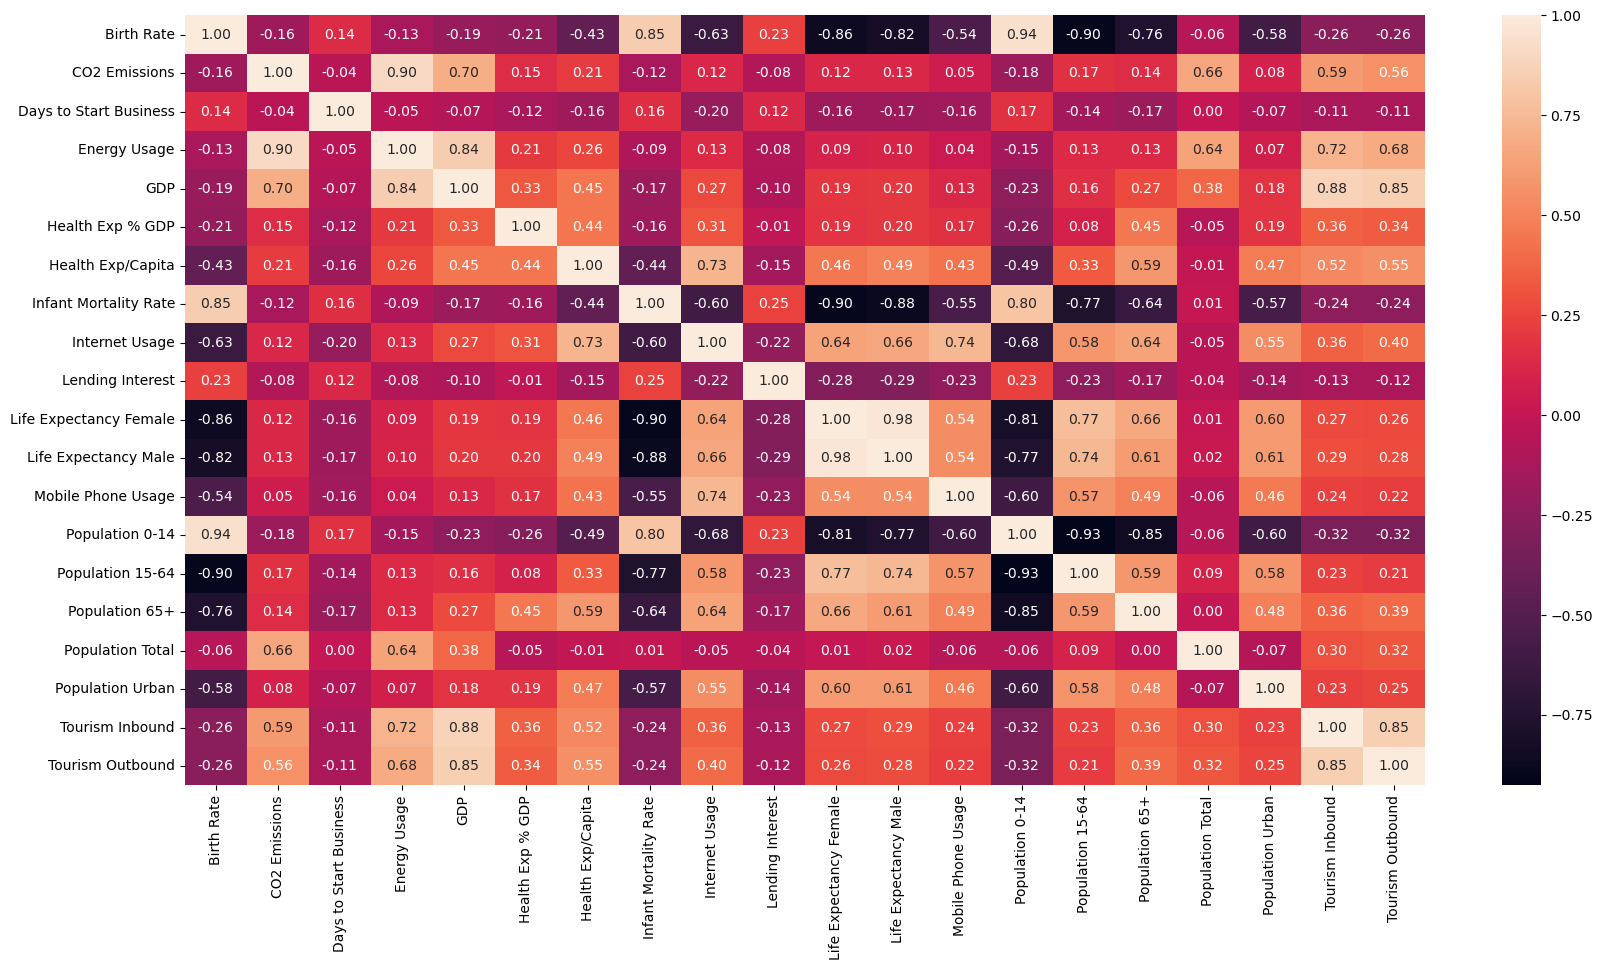

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.2f')

## Key Insights from correlation Matrix:
> 1. Energy Usage and CO2 Emissions are highly correlated(0.99)
> 2. Tourism Inbound and GDP are correlated(0.88)
> 3. Energy Usage and GDP(0.86)
> 4. Tourism Outbound and GDP are correlated(0.86)

Text(0.5, 1.0, 'Scatter Plot for CO2 Emissions and Energy Usage')

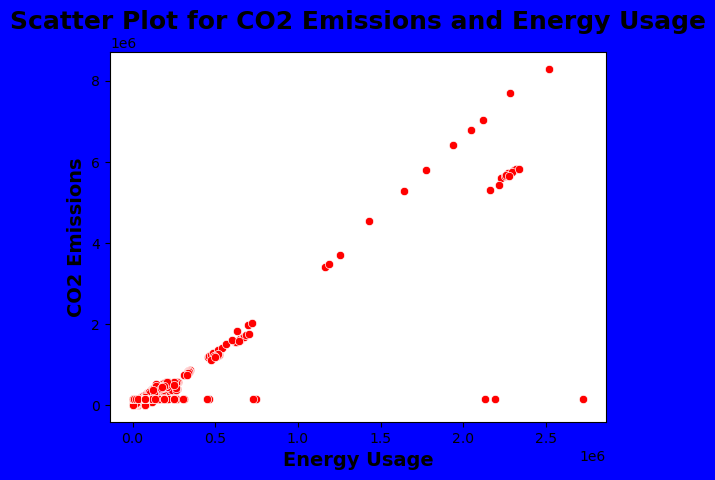

In [41]:
# Scatter Plot for Energy Usage and CO2 Emissions
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('blue')
sns.scatterplot(data=global_data,x='Energy Usage',y='CO2 Emissions',color='red')
plt.xlabel('Energy Usage',size=14,weight='bold')
plt.ylabel('CO2 Emissions',size=14,weight='bold')
plt.title("Scatter Plot for CO2 Emissions and Energy Usage",size=18,weight='bold')

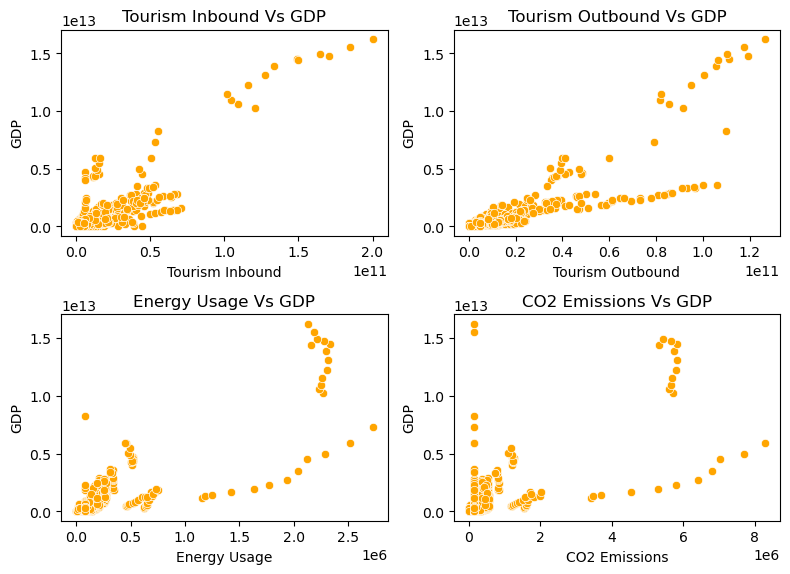

In [42]:
## Scatter plots for GDP related features
fig,axes=plt.subplots(2,2,figsize=(8,6))
sns.scatterplot(data=global_data,x='Tourism Inbound',y='GDP',color='orange',ax=axes[0,0])
axes[0,0].set_xlabel('Tourism Inbound')
axes[0,0].set_ylabel('GDP')
axes[0,0].set_title('Tourism Inbound Vs GDP')
sns.scatterplot(data=global_data,x='Tourism Outbound',y='GDP',color='orange',ax=axes[0,1])
axes[0,1].set_xlabel('Tourism Outbound')
axes[0,1].set_ylabel('GDP')
axes[0,1].set_title('Tourism Outbound Vs GDP')
sns.scatterplot(data=global_data,x='Energy Usage',y='GDP',color='orange',ax=axes[1,0])
axes[1,0].set_xlabel('Energy Usage')
axes[1,0].set_ylabel('GDP')
axes[1,0].set_title('Energy Usage Vs GDP')
sns.scatterplot(data=global_data,x='CO2 Emissions',y='GDP',color='orange',ax=axes[1,1])
axes[1,1].set_xlabel('CO2 Emissions')
axes[1,1].set_ylabel('GDP')
axes[1,1].set_title('CO2 Emissions Vs GDP')
plt.tight_layout()

In [43]:
# Scaling
#scale=MinMaxScaler()
#columns=global_data.select_dtypes(include='float').columns
#global_data[columns]=scale.fit_transform(global_data[columns])
#global_data

## Outlier handling

In [44]:
#z_scores=np.abs(zscore(global_data.select_dtypes(include=['float','int'])))
#z_scores

In [45]:
float_columns

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0          0.020        87931.0                     NaN       26998.0   
1          0.050         9542.0                     NaN        7499.0   
2          0.043         1617.0                     NaN        1983.0   
3          0.027         4276.0                     NaN        1836.0   
4          0.046         1041.0                     NaN           NaN   
...          ...            ...                     ...           ...   
2699         NaN            NaN                     NaN           NaN   
2700       0.013            NaN                     5.0     2132446.0   
2701       0.015            NaN                     7.0           NaN   
2702       0.020            NaN                   144.0           NaN   
2703       0.011            NaN                     NaN           NaN   

               GDP  Health Exp % GDP  Health Exp/Capita  \
0     5.479006e+10             0.035               60.0   
1     9.129595e+09             0.034               22.0   
2     2.359122e+09             0.043               15.0   
3     5.788312e+09             0.047              152.0   
4     2.610959e+09             0.051               12.0   
...            ...               ...                ...   
2699           NaN               NaN                NaN   
2700  1.624460e+13             0.179             8895.0   
2701  5.000435e+10             0.089             1308.0   
2702  3.812862e+11             0.046              593.0   
2703           NaN               NaN                NaN   

      Infant Mortality Rate  Internet Usage  Lending Interest  \
0                     0.034             0.0             0.100   
1                     0.128             0.0             1.032   
2                     0.090             0.0               NaN   
3                     0.054             0.0             0.155   
4                     0.096             0.0               NaN   
...                     ...             ...               ...   
2699                    NaN             NaN               NaN   
2700                  0.006             0.8             0.033   
2701                  0.010             0.5             0.112   
2702                  0.013             0.5             0.164   
2703                    NaN             0.4               NaN   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                     NaN                   NaN                 NaN   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 NaN   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
2700            0.196             0.667           0.136         313873685   
2701            0.220             0.639           0.140  

In [46]:
#outlier_count=(z_scores>3).sum(axis=0)
#outlier_count.sort_values(ascending=False)

In [47]:
def outlier_removal(df,cols,k=1.5):
    
    cleaned_data=df.copy()
    
    for col in cols:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        UB=Q3+k*IQR
        LB=Q1-k*IQR
    
        cleaned_data[col]=cleaned_data[col].apply(lambda x: LB if x <=LB else x)
    
        cleaned_data[col]=cleaned_data[col].apply(lambda x: UB if x>=UB else x)
    
    return cleaned_data

In [48]:
q1=global_data['CO2 Emissions'].quantile(0.25)
q3=global_data['CO2 Emissions'].quantile(0.75)
iqr=q3-q1
UB=q3+1.5*iqr
LB=q1-1.5*iqr

UB,LB

(352412.2694117647, -207868.1616470588)

In [49]:
cleaned_global_data=outlier_removal(global_data,float_columns)
cleaned_global_data

Birth Rate  CO2 Emissions                   Country  \
0       0.020000   87931.000000                   Algeria   
1       0.050000    9542.000000                    Angola   
2       0.043000    1617.000000                     Benin   
3       0.027000    4276.000000                  Botswana   
4       0.046000    1041.000000              Burkina Faso   
...          ...            ...                       ...   
2699    0.022715  142307.107765  Turks and Caicos Islands   
2700    0.013000  142307.107765             United States   
2701    0.015000  142307.107765                   Uruguay   
2702    0.020000  142307.107765             Venezuela, RB   
2703    0.011000  142307.107765     Virgin Islands (U.S.)   

      Days to Start Business   Energy Usage           GDP  Health Exp % GDP  \
0                  39.999418   26998.000000  5.479006e+10           0.03500   
1                  39.999418    7499.000000  9.129595e+09           0.03400   
2                  39.999418    1983.000000  2.359122e+09           0.04300   
3                  39.999418    1836.000000  5.788312e+09           0.04700   
4                  39.999418   77236.840896  2.610959e+09           0.05100   
...                      ...            ...           ...               ...   
2699               39.999418   77236.840896  2.638540e+11           0.06417   
2700                5.000000  181314.477241  4.663399e+11           0.11800   
2701                7.000000   77236.840896  5.000435e+10           0.08900   
2702               69.998545   77236.840896  3.812862e+11           0.04600   
2703               39.999418   77236.840896  2.638540e+11           0.06417   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  ...  \
0             60.000000               0.034000        0.000000  ...   
1             22.000000               0.107500        0.000000  ...   
2             15.000000               0.090000        0.000000  ...   
3            152.000000               0.054000        0.000000  ...   
4             12.000000               0.096000        0.000000  ...   
...                 ...                    ...             ...  ...   
2699         801.397077               0.032813        0.239747  ...   
2700        1916.492693               0.006000        0.800000  ...   
2701        1308.000000               0.010000        0.500000  ...   
2702         593.000000               0.013000        0.500000  ...   
2703         801.397077               0.032813        0.400000  ...   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                  71.000000             67.000000            0.000000   
1                  47.000000             44.000000            0.000000   
2                  57.000000             53.000000            0.000000   
3                  52.000000             49.000000            0.100000   
4                  52.000000             49.000000            0.000000   
...                      ...                   ...                 ...   
2699               71.159268             66.461838            0.578124   
2700               81.000000             76.000000            1.000000   
2701               80.000000             74.000000            1.500000   
2702               78.000000             72.000000            1.000000   
2703               83.000000             76.000000            0.578124   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0            0.342000          0.619000        0.039000      3.171945e+07   
1            0.476000          0.499000        0.025000      1.392493e+07   
2            0.454000          0.517000        0.029000      6.949366e+06   
3            0.383000          0.587000        0.029000      1.755375e+06   
4            0.468000          0.505000        0.028000      1.160794e+07   
...               ...               ...             ...               ...   
2699         0.303051          0.623481    

In [50]:
#Outlier Detection
## Check outliers present in data1
##fig, axes=plt.subplots(3,3,figsize=(14,12))
#sns.boxplot(cleaned_global_data['Birth Rate'],ax=axes[0,0])
#axes[0,0].set_title('Birth Rate')
#sns.boxplot(global_data['Business Tax Rate'],ax=axes[0,1],color='green')
#axes[0,1].set_title('Business Tax Rate')
#sns.boxplot(cleaned_global_data['CO2 Emissions'],ax=axes[0,1])
#axes[0,1].set_title('CO2 Emissions')
#sns.boxplot(cleaned_global_data['Days to Start Business'],ax=axes[0,2])
#axes[0,2].set_title('Days to Start Business')
#sns.boxplot(global_data['Ease of Business'],ax=axes[1,1],color='green')
#axes[1,1].set_title('Ease of Business')
#sns.boxplot(cleaned_global_data['Energy Usage'],ax=axes[1,0])
#axes[1,0].set_title('Energy Usage')
#sns.boxplot(cleaned_global_data['GDP'],ax=axes[1,1])
#axes[1,1].set_title('GDP')
#sns.boxplot(cleaned_global_data['Health Exp % GDP'],ax=axes[1,2])
#axes[1,2].set_title('Health Exp % GDP')
#sns.boxplot(cleaned_global_data['Health Exp/Capita'],ax=axes[2,0])
#axes[2,0].set_title('Health Exp/Capita')
#p#lt.tight_layout(pad=2.0)##



In [51]:
#fig, axes=plt.subplots(5,3,figsize=(15,13),sharex=False,sharey=False)
#sns.boxplot(global_data['Hours to do Tax'],ax=axes[0,0])
#axes[0,0].set_title('Hours to do Tax')
#sns.boxplot(cleaned_global_data['Infant Mortality Rate'],ax=axes[0,1])
#axes[0,1].set_title('Infant Mortality Rate')
#sns.boxplot(cleaned_global_data['Internet Usage'],ax=axes[0,2])
#axes[0,2].set_title('Internet Usage')
#sns.boxplot(cleaned_global_data['Lending Interest'],ax=axes[1,0])
#axes[1,0].set_title('Lending Interest')
#sns.boxplot(cleaned_global_data['Life Expectancy Female'],ax=axes[1,1])
#axes[1,1].set_title('Life Expectancy Female')
#sns.boxplot(cleaned_global_data['Life Expectancy Male'],ax=axes[1,2])
#axes[1,2].set_title('Life Expectancy Male')
#sns.boxplot(cleaned_global_data['Mobile Phone Usage'],ax=axes[2,0])
#axes[2,0].set_title('Mobile Phone Usage')
#sns.boxplot(cleaned_global_data['Population 0-14'],ax=axes[2,1])
#axes[2,1].set_title('Population 0-14')
#sns.boxplot(cleaned_global_data['Population 15-64'],ax=axes[2,2])
#axes[2,2].set_title('Population 15-64')
#sns.boxplot(cleaned_global_data['Population 65+'],ax=axes[3,0])
#axes[3,0].set_title('Population 65+')
#sns.boxplot(cleaned_global_data['Population Total'],ax=axes[3,1])
#axes[3,1].set_title('Population Total')
#s#ns.boxplot(cleaned_global_data['Population Urban'],ax=axes[3,2])
#axes[3,2].set_title('Population Urban')
#sns.boxplot(cleaned_global_data['Tourism Inbound'],ax=axes[4,0])
#axes[4,0].set_title('Tourism Inbound')
#sns.boxplot(cleaned_global_data['Tourism Outbound'],ax=axes[4,1])
#axes[4,1].set_title('Tourism Outbound')
#plt.tight_layout(pad=2.0)

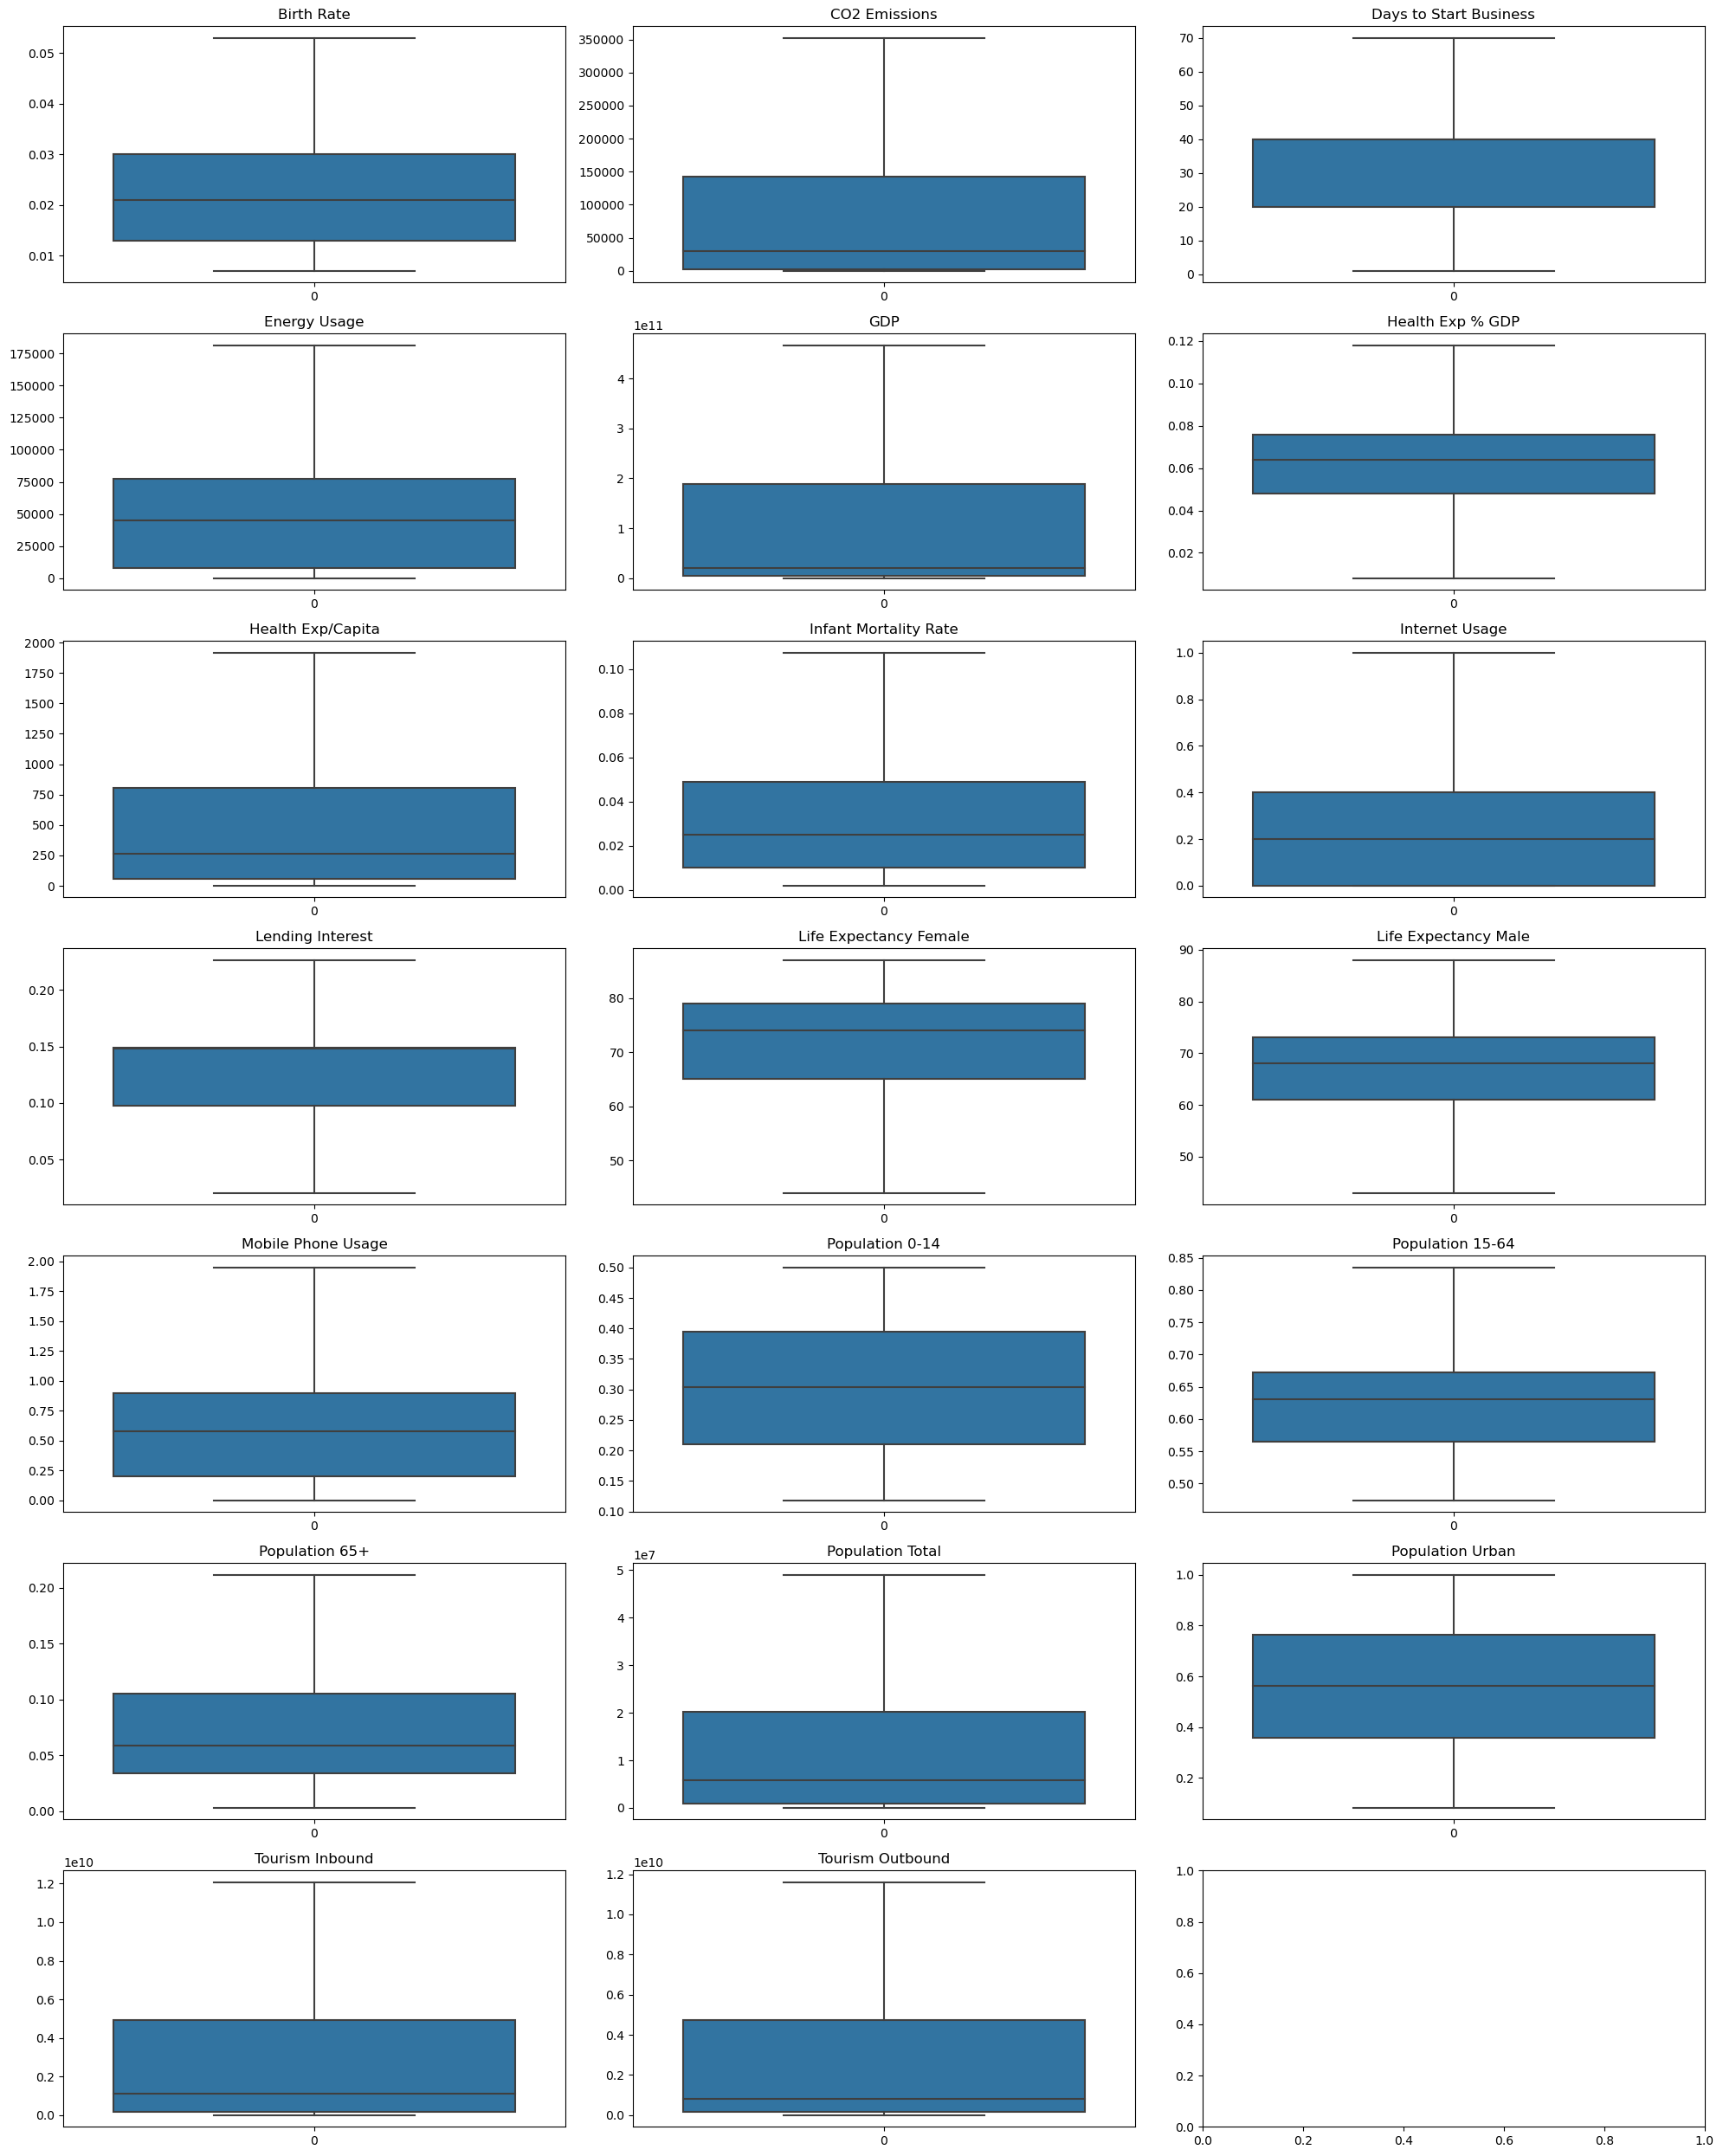

In [51]:
fig,axes=plt.subplots(7,3,figsize=(20,25))
axes=axes.flatten()
features_to_plot=['Birth Rate','CO2 Emissions','Days to Start Business','Energy Usage','GDP','Health Exp % GDP','Health Exp/Capita',
                  'Infant Mortality Rate','Internet Usage','Lending Interest','Life Expectancy Female','Life Expectancy Male',
                  'Mobile Phone Usage','Population 0-14','Population 15-64','Population 65+','Population Total','Population Urban',
                 'Tourism Inbound','Tourism Outbound']
for i,feature in enumerate(features_to_plot):
    sns.boxplot(cleaned_global_data[feature],ax=axes[i])
    axes[i].set_title(feature)
    

plt.tight_layout()

# Scaling

In [52]:
# Scaling
scale=MinMaxScaler()
scale_data=cleaned_global_data.copy()
columns=scale_data.select_dtypes(include='float').columns
scale_data[columns]=scale.fit_transform(scale_data[columns])
scale_data

Birth Rate  CO2 Emissions                   Country  \
0       0.282609       0.249497                   Algeria   
1       0.934783       0.027057                    Angola   
2       0.782609       0.004569                     Benin   
3       0.434783       0.012114                  Botswana   
4       0.847826       0.002934              Burkina Faso   
...          ...            ...                       ...   
2699    0.341628       0.403797  Turks and Caicos Islands   
2700    0.130435       0.403797             United States   
2701    0.173913       0.403797                   Uruguay   
2702    0.282609       0.403797             Venezuela, RB   
2703    0.086957       0.403797     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage       GDP  Health Exp % GDP  \
0                   0.565221      0.148864  0.117370          0.245455   
1                   0.565221      0.041317  0.019444          0.236364   
2                   0.565221      0.010893  0.004924          0.318182   
3                   0.565221      0.010082  0.012279          0.354545   
4                   0.565221      0.425957  0.005464          0.390909   
...                      ...           ...       ...               ...   
2699                0.565221      0.425957  0.565739          0.510632   
2700                0.057972      1.000000  1.000000          1.000000   
2701                0.086958      0.425957  0.107106          0.736364   
2702                1.000000      0.425957  0.817590          0.345455   
2703                0.565221      0.425957  0.565739          0.510632   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  ...  \
0              0.030295               0.303318        0.000000  ...   
1              0.010447               1.000000        0.000000  ...   
2              0.006790               0.834123        0.000000  ...   
3              0.078350               0.492891        0.000000  ...   
4              0.005223               0.890995        0.000000  ...   
...                 ...                    ...             ...  ...   
2699           0.417550               0.292066        0.239747  ...   
2700           1.000000               0.037915        0.800000  ...   
2701           0.682165               0.075829        0.500000  ...   
2702           0.308698               0.104265        0.500000  ...   
2703           0.417550               0.292066        0.400000  ...   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                   0.627907              0.533333            0.000000   
1                   0.069767              0.022222            0.000000   
2                   0.302326              0.222222            0.000000   
3                   0.186047              0.133333            0.051282   
4                   0.186047              0.133333            0.000000   
...                      ...                   ...                 ...   
2699                0.631611              0.521374            0.296474   
2700                0.860465              0.733333            0.512821   
2701                0.837209              0.688889            0.769231   
2702                0.790698              0.644444            0.512821   
2703                0.906977              0.733333            0.296474   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0            0.586387          0.401662        0.172662          0.646741   
1            0.937173          0.069252        0.105516          0.283705   
2            0.879581          0.119114        0.124700          0.141393   
3            0.693717          0.313019        0.124700          0.035427   
4            0.916230          0.085873        0.119904          0.236435   
...               ...               ...             ...               ...   
2699         0.484427          0.414076        0.337960          0.000276   
2700         0.204188     

## Principal Component Analysis-Feature Extraction

In [53]:
pca=PCA(n_components=6)

In [54]:
pca_values=pca.fit_transform(scale_data.select_dtypes(exclude='object'))
pca_values

array([[-3.95833449e-01,  1.29253305e-01,  5.39727708e-01,
         2.63140790e-02,  1.48981171e-01, -1.40860651e-01],
       [-1.42166103e+00,  4.66385847e-01, -3.92240227e-01,
        -7.01082646e-03, -9.45213065e-02, -6.85297737e-02],
       [-1.17461652e+00,  1.73083921e-01, -2.62894509e-01,
        -1.08212892e-03,  1.16235694e-01, -1.21619191e-01],
       ...,
       [ 6.99631601e-01, -5.64472586e-01, -1.37508877e-01,
        -3.17311919e-01, -1.41354826e-01,  4.05630827e-01],
       [ 4.51037689e-01,  2.34412407e-01,  3.21957321e-01,
         5.07923683e-01,  3.30017114e-03,  2.18554632e-01],
       [ 7.03282045e-01, -1.73845077e-01, -5.05540978e-02,
         3.60623514e-01, -1.52118797e-01,  2.13071589e-01]])

In [55]:
pca.components_

array([[-2.34373912e-01,  2.22010112e-01, -1.19839911e-01,
         1.44891055e-01,  3.04005200e-01,  9.11460945e-02,
         3.24556789e-01, -2.43267085e-01,  2.44600600e-01,
        -1.57793870e-01,  2.33247415e-01,  1.94937892e-01,
         1.86919958e-01, -2.75325579e-01,  1.67165948e-01,
         2.14013818e-01,  1.10483717e-01,  2.17901873e-01,
         3.02994520e-01,  2.86471523e-01],
       [ 1.88527517e-01,  3.21846395e-01,  4.50648985e-02,
         3.45770822e-01,  3.11489917e-01, -3.37211677e-02,
        -1.22812462e-01,  2.27660376e-01, -1.33569372e-01,
         5.88367284e-02, -1.93883589e-01, -1.57944922e-01,
        -1.34645891e-01,  1.84802554e-01, -1.30282656e-01,
        -1.13138012e-01,  5.17348024e-01, -1.38464550e-01,
         2.29246960e-01,  2.62560267e-01],
       [-2.65350482e-01,  2.03834479e-01,  1.20854998e-01,
        -1.83837032e-02, -5.73772537e-02, -2.49242134e-01,
        -4.36128273e-01, -2.92007594e-01, -2.24118465e-01,
        -4.27937425e-02,  2.3

In [56]:
var=(pca.explained_variance_ratio_)
var

array([0.47184001, 0.18589542, 0.06597631, 0.04512243, 0.03577773,
       0.03209945])

In [57]:
var_percent=var*100
var_percent

array([47.18400071, 18.58954166,  6.59763091,  4.51224338,  3.57777342,
        3.20994461])

In [58]:
var1=np.round(var)
var1

array([0., 0., 0., 0., 0., 0.])

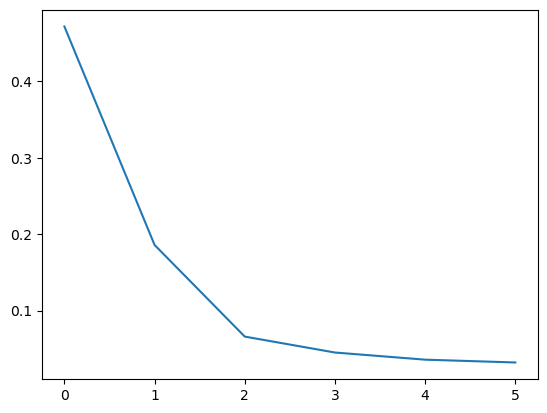

In [59]:
plt.plot(var)

In [60]:
np.cumsum(var_percent)

array([47.18400071, 65.77354237, 72.37117328, 76.88341666, 80.46119009,
       83.6711347 ])

In [61]:
## PCA data Frame
pca_data=pd.DataFrame(pca_values,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
pca_data

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0    -0.395833  0.129253  0.539728  0.026314  0.148981 -0.140861
1    -1.421661  0.466386 -0.392240 -0.007011 -0.094521 -0.068530
2    -1.174617  0.173084 -0.262895 -0.001082  0.116236 -0.121619
3    -0.904960 -0.074561 -0.127462  0.095130  0.047747 -0.041357
4    -1.238808  0.466069 -0.329736 -0.111862  0.071633  0.026684
...        ...       ...       ...       ...       ...       ...
2699  0.330991  0.083291 -0.243923  0.341807  0.029123  0.273637
2700  1.909209  0.715630 -0.381085 -0.314408 -0.050559 -0.197224
2701  0.699632 -0.564473 -0.137509 -0.317312 -0.141355  0.405631
2702  0.451038  0.234412  0.321957  0.507924  0.003300  0.218555
2703  0.703282 -0.173845 -0.050554  0.360624 -0.152119  0.213072

[2704 rows x 6 columns]

# Model Building 

## Model 1: Hierarchial Clustering with scaled data

In [62]:
scale_data
clust_data=scale_data.copy()
clust_data=clust_data.drop(columns='Country')
clust_data

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0       0.282609       0.249497                0.565221      0.148864   
1       0.934783       0.027057                0.565221      0.041317   
2       0.782609       0.004569                0.565221      0.010893   
3       0.434783       0.012114                0.565221      0.010082   
4       0.847826       0.002934                0.565221      0.425957   
...          ...            ...                     ...           ...   
2699    0.341628       0.403797                0.565221      0.425957   
2700    0.130435       0.403797                0.057972      1.000000   
2701    0.173913       0.403797                0.086958      0.425957   
2702    0.282609       0.403797                1.000000      0.425957   
2703    0.086957       0.403797                0.565221      0.425957   

           GDP  Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
0     0.117370          0.245455           0.030295               0.303318   
1     0.019444          0.236364           0.010447               1.000000   
2     0.004924          0.318182           0.006790               0.834123   
3     0.012279          0.354545           0.078350               0.492891   
4     0.005464          0.390909           0.005223               0.890995   
...        ...               ...                ...                    ...   
2699  0.565739          0.510632           0.417550               0.292066   
2700  1.000000          1.000000           1.000000               0.037915   
2701  0.107106          0.736364           0.682165               0.075829   
2702  0.817590          0.345455           0.308698               0.104265   
2703  0.565739          0.510632           0.417550               0.292066   

      Internet Usage  Lending Interest  Life Expectancy Female  \
0           0.000000          0.385922                0.627907   
1           0.000000          1.000000                0.069767   
2           0.000000          0.619430                0.302326   
3           0.000000          0.652913                0.186047   
4           0.000000          0.619430                0.186047   
...              ...               ...                     ...   
2699        0.239747          0.619430                0.631611   
2700        0.800000          0.060680                0.860465   
2701        0.500000          0.444175                0.837209   
2702        0.500000          0.696602                0.790698   
2703        0.400000          0.619430                0.906977   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                 0.533333            0.000000         0.586387   
1                 0.022222            0.000000         0.937173   
2                 0.222222            0.000000         0.879581   
3                 0.133333            0.051282         0.693717   
4                 0.133333            0.000000         0.916230   
...                    ...                 ...              ...   
2699              0.521374            0.296474         0.484427   
2700              0.733333            0.512821         0.204188   
2701              0.688889            0.769231         0.267016   
2702              0.644444            0.512821         0.445026   
2703              0.733333            0.296474         0.230366   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.401662        0.172662          0.646741          0.563181   
1             0.069252        0.105516          0.283705          0.263617   
2             0.119114        0.124700          0.141393          0.327887   
3             0.313019        0.124700          0.035427          0.490196   
4             0.085873        0.119904          0.236435          0.104575   
...                ...             ...               ...               ...   
2699          0.414076        0.337960          

In [63]:
link=linkage(clust_data,method='average',metric='euclidean')
link

array([[6.15000000e+02, 8.23000000e+02, 1.77493609e-06, 2.00000000e+00],
       [4.07000000e+02, 2.70400000e+03, 7.66078737e-06, 3.00000000e+00],
       [2.27900000e+03, 2.48700000e+03, 7.75259441e-06, 2.00000000e+00],
       ...,
       [5.38100000e+03, 5.40100000e+03, 1.65326380e+00, 3.17000000e+02],
       [5.40200000e+03, 5.40400000e+03, 1.84050036e+00, 5.26000000e+02],
       [5.40300000e+03, 5.40500000e+03, 2.10943250e+00, 2.70400000e+03]])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [62.5, 62.5, 106.25, 106.25],
  [32.5, 32.5, 84.375, 84.375],
  [10.0, 10.0, 58.4375, 58.4375],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [150.0, 150.0, 190.0, 190.0],
  [225.0, 225.0, 235.0, 235.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [295.0, 295.0, 305.0, 305.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [300.0, 300.0, 323.75, 323.75],
  [263.75, 263.75, 311.875, 311.875],
  [245.0, 245.0, 287.8125, 287.8125],
  [230.0, 230.0, 266.40625, 266.40625],
  

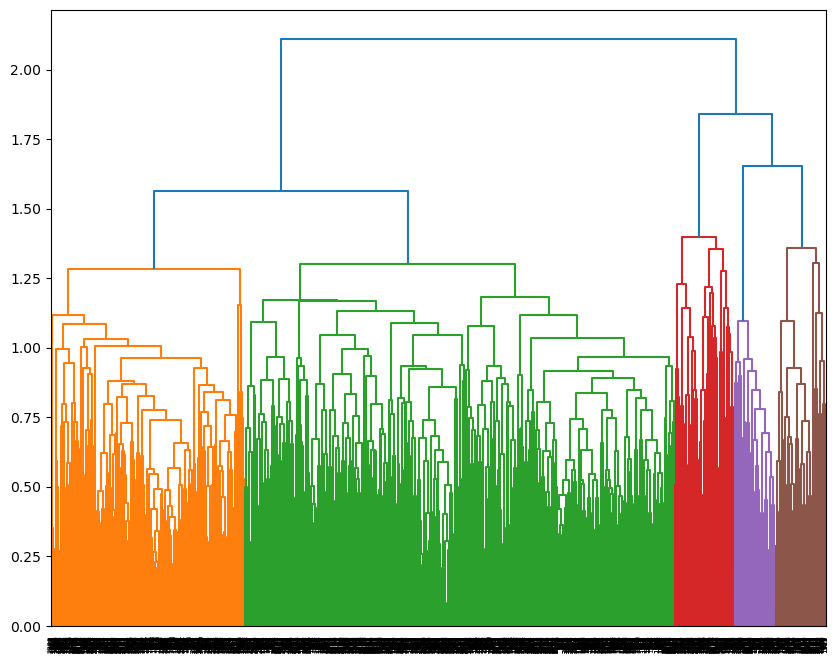

In [64]:
plt.figure(figsize=(10,8))
dendogram=dendrogram(link)
dendogram

In [65]:
agg_clust=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average').fit(clust_data)
agg_clust

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [66]:
agg_clust_labels=agg_clust.labels_
agg_clust_labels.shape

(2704,)

In [67]:
agg_clust_labels=pd.DataFrame(agg_clust_labels)
agg_clust_labels

0
0     0
1     0
2     0
3     0
4     0
...  ..
2699  0
2700  3
2701  0
2702  0
2703  0

[2704 rows x 1 columns]

In [68]:
agg_clust_labels.value_counts()

0    2178
2     209
1     174
3     143
dtype: int64

In [69]:
clust_data['labels']=agg_clust_labels
clust_data

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0       0.282609       0.249497                0.565221      0.148864   
1       0.934783       0.027057                0.565221      0.041317   
2       0.782609       0.004569                0.565221      0.010893   
3       0.434783       0.012114                0.565221      0.010082   
4       0.847826       0.002934                0.565221      0.425957   
...          ...            ...                     ...           ...   
2699    0.341628       0.403797                0.565221      0.425957   
2700    0.130435       0.403797                0.057972      1.000000   
2701    0.173913       0.403797                0.086958      0.425957   
2702    0.282609       0.403797                1.000000      0.425957   
2703    0.086957       0.403797                0.565221      0.425957   

           GDP  Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
0     0.117370          0.245455           0.030295               0.303318   
1     0.019444          0.236364           0.010447               1.000000   
2     0.004924          0.318182           0.006790               0.834123   
3     0.012279          0.354545           0.078350               0.492891   
4     0.005464          0.390909           0.005223               0.890995   
...        ...               ...                ...                    ...   
2699  0.565739          0.510632           0.417550               0.292066   
2700  1.000000          1.000000           1.000000               0.037915   
2701  0.107106          0.736364           0.682165               0.075829   
2702  0.817590          0.345455           0.308698               0.104265   
2703  0.565739          0.510632           0.417550               0.292066   

      Internet Usage  Lending Interest  ...  Life Expectancy Male  \
0           0.000000          0.385922  ...              0.533333   
1           0.000000          1.000000  ...              0.022222   
2           0.000000          0.619430  ...              0.222222   
3           0.000000          0.652913  ...              0.133333   
4           0.000000          0.619430  ...              0.133333   
...              ...               ...  ...                   ...   
2699        0.239747          0.619430  ...              0.521374   
2700        0.800000          0.060680  ...              0.733333   
2701        0.500000          0.444175  ...              0.688889   
2702        0.500000          0.696602  ...              0.644444   
2703        0.400000          0.619430  ...              0.733333   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0               0.000000         0.586387          0.401662        0.172662   
1               0.000000         0.937173          0.069252        0.105516   
2               0.000000         0.879581          0.119114        0.124700   
3               0.051282         0.693717          0.313019        0.124700   
4               0.000000         0.916230          0.085873        0.119904   
...                  ...              ...               ...             ...   
2699            0.296474         0.484427          0.414076        0.337960   
2700            0.512821         0.204188          0.534626        0.637890   
2701            0.769231         0.267016          0.457064        0.657074   
2702            0.512821         0.445026          0.493075        0.273381   
2703            0.296474         0.230366          0.462604        0.714628   

      Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
0             0.646741          0.563181         0.008394          0.016617   
1             0.283705          0.263617         0.002759          0.012566   
2             0.141393          0.327887         0.006322          0.004292   
3             0.035427          0.490196         0.018751          0.017996   
4             0.236

<Axes: xlabel='CO2 Emissions', ylabel='Energy Usage'>

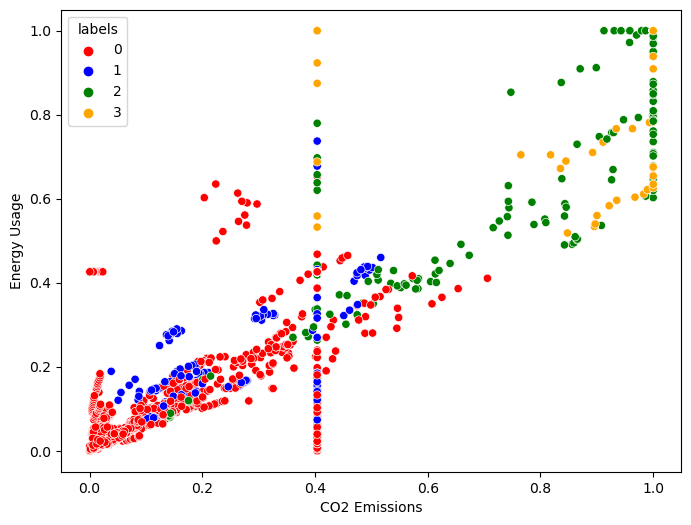

In [70]:
palette=['red','blue','green','orange']
plt.figure(figsize=(8,6))
sns.scatterplot(data=clust_data,x='CO2 Emissions',y='Energy Usage',hue='labels',palette=palette)

In [71]:
# Calculate silhoutte scores for the labels
hie_sil_score=silhouette_score(clust_data,labels=agg_clust_labels)
hie_sil_score

0.4069002367119094

## Hierarchial Clustering for complete linkage

In [72]:
clust_data_complete=scale_data.copy()
clust_data_complete=clust_data_complete.drop(columns='Country')
clust_data_complete

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0       0.282609       0.249497                0.565221      0.148864   
1       0.934783       0.027057                0.565221      0.041317   
2       0.782609       0.004569                0.565221      0.010893   
3       0.434783       0.012114                0.565221      0.010082   
4       0.847826       0.002934                0.565221      0.425957   
...          ...            ...                     ...           ...   
2699    0.341628       0.403797                0.565221      0.425957   
2700    0.130435       0.403797                0.057972      1.000000   
2701    0.173913       0.403797                0.086958      0.425957   
2702    0.282609       0.403797                1.000000      0.425957   
2703    0.086957       0.403797                0.565221      0.425957   

           GDP  Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
0     0.117370          0.245455           0.030295               0.303318   
1     0.019444          0.236364           0.010447               1.000000   
2     0.004924          0.318182           0.006790               0.834123   
3     0.012279          0.354545           0.078350               0.492891   
4     0.005464          0.390909           0.005223               0.890995   
...        ...               ...                ...                    ...   
2699  0.565739          0.510632           0.417550               0.292066   
2700  1.000000          1.000000           1.000000               0.037915   
2701  0.107106          0.736364           0.682165               0.075829   
2702  0.817590          0.345455           0.308698               0.104265   
2703  0.565739          0.510632           0.417550               0.292066   

      Internet Usage  Lending Interest  Life Expectancy Female  \
0           0.000000          0.385922                0.627907   
1           0.000000          1.000000                0.069767   
2           0.000000          0.619430                0.302326   
3           0.000000          0.652913                0.186047   
4           0.000000          0.619430                0.186047   
...              ...               ...                     ...   
2699        0.239747          0.619430                0.631611   
2700        0.800000          0.060680                0.860465   
2701        0.500000          0.444175                0.837209   
2702        0.500000          0.696602                0.790698   
2703        0.400000          0.619430                0.906977   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                 0.533333            0.000000         0.586387   
1                 0.022222            0.000000         0.937173   
2                 0.222222            0.000000         0.879581   
3                 0.133333            0.051282         0.693717   
4                 0.133333            0.000000         0.916230   
...                    ...                 ...              ...   
2699              0.521374            0.296474         0.484427   
2700              0.733333            0.512821         0.204188   
2701              0.688889            0.769231         0.267016   
2702              0.644444            0.512821         0.445026   
2703              0.733333            0.296474         0.230366   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.401662        0.172662          0.646741          0.563181   
1             0.069252        0.105516          0.283705          0.263617   
2             0.119114        0.124700          0.141393          0.327887   
3             0.313019        0.124700          0.035427          0.490196   
4             0.085873        0.119904          0.236435          0.104575   
...                ...             ...               ...               ...   
2699          0.414076        0.337960          

In [73]:
complete_link=linkage(clust_data_complete,method='complete',metric='euclidean')
complete_link

array([[6.15000000e+02, 8.23000000e+02, 1.77493609e-06, 2.00000000e+00],
       [2.27900000e+03, 2.48700000e+03, 7.75259441e-06, 2.00000000e+00],
       [4.07000000e+02, 2.70400000e+03, 8.54825542e-06, 3.00000000e+00],
       ...,
       [5.39700000e+03, 5.40000000e+03, 2.76251307e+00, 1.07800000e+03],
       [5.40300000e+03, 5.40400000e+03, 3.11657479e+00, 1.42000000e+03],
       [5.40200000e+03, 5.40500000e+03, 3.74264371e+00, 2.70400000e+03]])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [120.0, 120.0, 150.0, 150.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [135.0, 135.0, 183.75, 183.75],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [215.0, 215.0, 240.0, 240.0],
  [159.375, 159.375, 227.5, 227.5],
  [81.25, 81.25, 193.4375, 193.4375],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [272.5, 272.5, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  [375.0, 375.0, 385

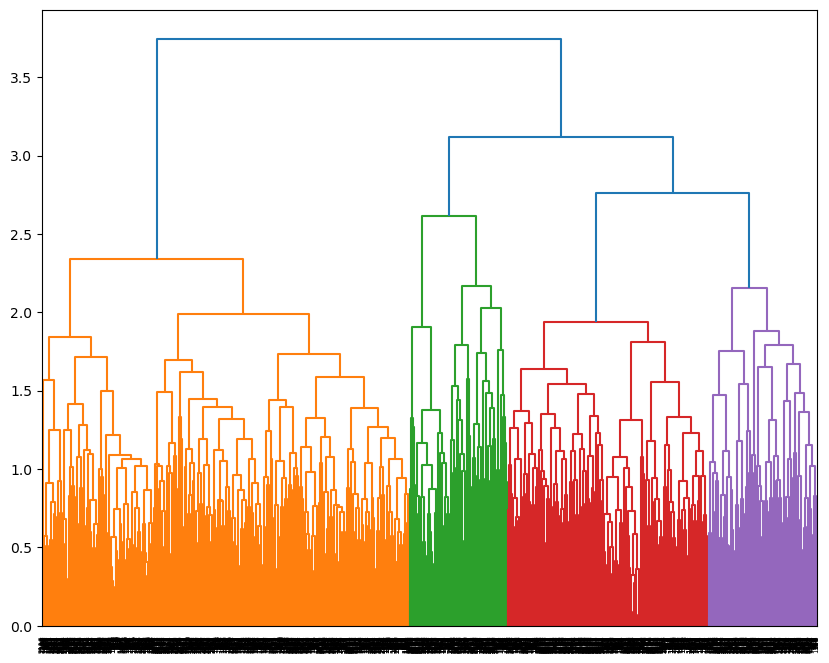

In [74]:
plt.figure(figsize=(10,8))
dendogram=dendrogram(complete_link)
dendogram

In [75]:
agg_clust_complete=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete').fit(clust_data)
agg_clust_complete

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [76]:
agg_clust_labels_complete=agg_clust_complete.labels_
agg_clust_labels_complete=pd.DataFrame(agg_clust_labels_complete)
agg_clust_labels_complete.value_counts()

1    1532
3     646
0     352
2     174
dtype: int64

In [77]:
clust_data_complete['Complete_hie_labels']=agg_clust_labels_complete

In [78]:
hie_complete_score=silhouette_score(clust_data_complete,labels=agg_clust_labels_complete)
hie_complete_score

0.44947005579625016

## Agglomerative Clustering on PCA data

In [79]:
pca_data

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0    -0.395833  0.129253  0.539728  0.026314  0.148981 -0.140861
1    -1.421661  0.466386 -0.392240 -0.007011 -0.094521 -0.068530
2    -1.174617  0.173084 -0.262895 -0.001082  0.116236 -0.121619
3    -0.904960 -0.074561 -0.127462  0.095130  0.047747 -0.041357
4    -1.238808  0.466069 -0.329736 -0.111862  0.071633  0.026684
...        ...       ...       ...       ...       ...       ...
2699  0.330991  0.083291 -0.243923  0.341807  0.029123  0.273637
2700  1.909209  0.715630 -0.381085 -0.314408 -0.050559 -0.197224
2701  0.699632 -0.564473 -0.137509 -0.317312 -0.141355  0.405631
2702  0.451038  0.234412  0.321957  0.507924  0.003300  0.218555
2703  0.703282 -0.173845 -0.050554  0.360624 -0.152119  0.213072

[2704 rows x 6 columns]

In [80]:
pca_hie=pca_data.copy()

In [81]:
pca_link=linkage(pca_hie,metric='euclidean',method='average')
pca_link

array([[6.15000000e+02, 8.23000000e+02, 1.45792112e-06, 2.00000000e+00],
       [4.07000000e+02, 2.70400000e+03, 6.29252163e-06, 3.00000000e+00],
       [2.27900000e+03, 2.48700000e+03, 6.36793134e-06, 2.00000000e+00],
       ...,
       [5.36200000e+03, 5.40100000e+03, 1.43408222e+00, 2.75000000e+02],
       [5.39100000e+03, 5.40400000e+03, 1.67604082e+00, 4.71000000e+02],
       [5.40300000e+03, 5.40500000e+03, 2.03830213e+00, 2.70400000e+03]])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [40.0, 40.0, 80.0, 80.0],
  [10.0, 10.0, 60.0, 60.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [162.5, 162.5, 193.75, 193.75],
  [132.5, 132.5, 178.125, 178.125],
  [115.0, 115.0, 155.3125, 155.3125],
  [105.0, 105.0, 135.15625, 135.15625],
  [35.0, 35.0, 120.078125, 120.078125],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [312.5, 312.5, 340.0, 340.0],
  [355.0

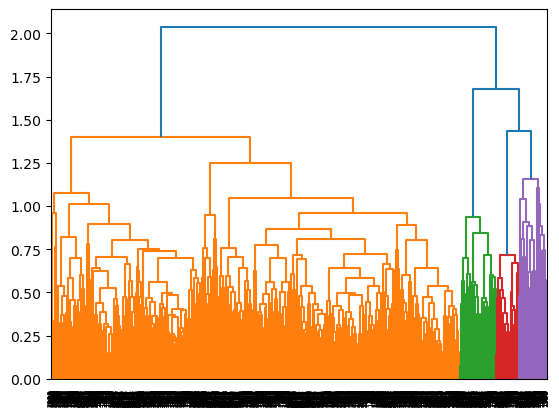

In [82]:
pca_dend=dendrogram(pca_link)
pca_dend

In [83]:
pca_clust=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average').fit(pca_hie)
pca_clust

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [84]:
pca_hie_labels=pca_clust.labels_

In [85]:
pca_hie_labels=pd.DataFrame(pca_hie_labels)
pca_hie_labels.value_counts()

0    2233
2     196
1     150
3     125
dtype: int64

In [86]:
pca_hie['pca_hie_labels']=pca_hie_labels

In [87]:
pca_hie_silscore=silhouette_score(pca_hie,labels=pca_hie_labels)
pca_hie_silscore

0.48921784691834225

# KMeans Clustering on Original Data

In [88]:
kmeans_data=scale_data.copy()
kmeans_data=kmeans_data.drop(columns='Country')
kmeans_data


Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0       0.282609       0.249497                0.565221      0.148864   
1       0.934783       0.027057                0.565221      0.041317   
2       0.782609       0.004569                0.565221      0.010893   
3       0.434783       0.012114                0.565221      0.010082   
4       0.847826       0.002934                0.565221      0.425957   
...          ...            ...                     ...           ...   
2699    0.341628       0.403797                0.565221      0.425957   
2700    0.130435       0.403797                0.057972      1.000000   
2701    0.173913       0.403797                0.086958      0.425957   
2702    0.282609       0.403797                1.000000      0.425957   
2703    0.086957       0.403797                0.565221      0.425957   

           GDP  Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
0     0.117370          0.245455           0.030295               0.303318   
1     0.019444          0.236364           0.010447               1.000000   
2     0.004924          0.318182           0.006790               0.834123   
3     0.012279          0.354545           0.078350               0.492891   
4     0.005464          0.390909           0.005223               0.890995   
...        ...               ...                ...                    ...   
2699  0.565739          0.510632           0.417550               0.292066   
2700  1.000000          1.000000           1.000000               0.037915   
2701  0.107106          0.736364           0.682165               0.075829   
2702  0.817590          0.345455           0.308698               0.104265   
2703  0.565739          0.510632           0.417550               0.292066   

      Internet Usage  Lending Interest  Life Expectancy Female  \
0           0.000000          0.385922                0.627907   
1           0.000000          1.000000                0.069767   
2           0.000000          0.619430                0.302326   
3           0.000000          0.652913                0.186047   
4           0.000000          0.619430                0.186047   
...              ...               ...                     ...   
2699        0.239747          0.619430                0.631611   
2700        0.800000          0.060680                0.860465   
2701        0.500000          0.444175                0.837209   
2702        0.500000          0.696602                0.790698   
2703        0.400000          0.619430                0.906977   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                 0.533333            0.000000         0.586387   
1                 0.022222            0.000000         0.937173   
2                 0.222222            0.000000         0.879581   
3                 0.133333            0.051282         0.693717   
4                 0.133333            0.000000         0.916230   
...                    ...                 ...              ...   
2699              0.521374            0.296474         0.484427   
2700              0.733333            0.512821         0.204188   
2701              0.688889            0.769231         0.267016   
2702              0.644444            0.512821         0.445026   
2703              0.733333            0.296474         0.230366   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.401662        0.172662          0.646741          0.563181   
1             0.069252        0.105516          0.283705          0.263617   
2             0.119114        0.124700          0.141393          0.327887   
3             0.313019        0.124700          0.035427          0.490196   
4             0.085873        0.119904          0.236435          0.104575   
...                ...             ...               ...               ...   
2699          0.414076        0.337960          

Text(0, 0.5, 'Inertia')

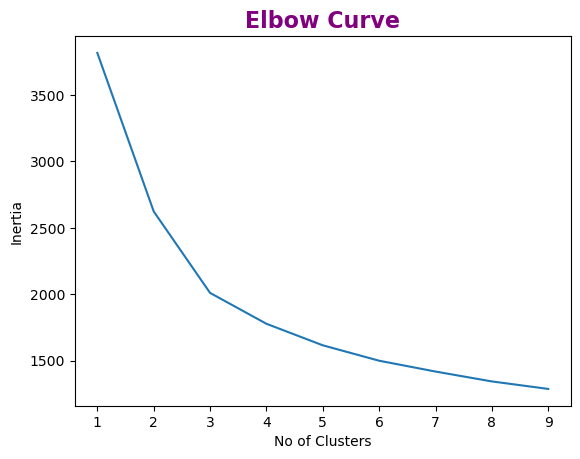

In [89]:
WCSS=[]
for i in range(1,10):
    k=KMeans(n_clusters=i).fit(kmeans_data)
    WCSS.append(k.inertia_)
    
plt.plot(range(1,10),WCSS)
plt.title('Elbow Curve',color='purple',weight='bold',size=16)
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')

In [90]:
# From the above curve considering 3 clusters 

In [91]:
orig_kmeans=KMeans(n_clusters=3).fit(kmeans_data)
orig_kmeans

KMeans(n_clusters=3)

In [92]:
orig_kmeans_labels=orig_kmeans.labels_

In [93]:
orig_kmeans_labels=pd.DataFrame(orig_kmeans_labels)

In [94]:
orig_kmeans_labels.value_counts()

0    1267
1    1012
2     425
dtype: int64

In [95]:
kmeans_data['kmeans_labels']=orig_kmeans_labels
kmeans_data

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0       0.282609       0.249497                0.565221      0.148864   
1       0.934783       0.027057                0.565221      0.041317   
2       0.782609       0.004569                0.565221      0.010893   
3       0.434783       0.012114                0.565221      0.010082   
4       0.847826       0.002934                0.565221      0.425957   
...          ...            ...                     ...           ...   
2699    0.341628       0.403797                0.565221      0.425957   
2700    0.130435       0.403797                0.057972      1.000000   
2701    0.173913       0.403797                0.086958      0.425957   
2702    0.282609       0.403797                1.000000      0.425957   
2703    0.086957       0.403797                0.565221      0.425957   

           GDP  Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
0     0.117370          0.245455           0.030295               0.303318   
1     0.019444          0.236364           0.010447               1.000000   
2     0.004924          0.318182           0.006790               0.834123   
3     0.012279          0.354545           0.078350               0.492891   
4     0.005464          0.390909           0.005223               0.890995   
...        ...               ...                ...                    ...   
2699  0.565739          0.510632           0.417550               0.292066   
2700  1.000000          1.000000           1.000000               0.037915   
2701  0.107106          0.736364           0.682165               0.075829   
2702  0.817590          0.345455           0.308698               0.104265   
2703  0.565739          0.510632           0.417550               0.292066   

      Internet Usage  Lending Interest  ...  Life Expectancy Male  \
0           0.000000          0.385922  ...              0.533333   
1           0.000000          1.000000  ...              0.022222   
2           0.000000          0.619430  ...              0.222222   
3           0.000000          0.652913  ...              0.133333   
4           0.000000          0.619430  ...              0.133333   
...              ...               ...  ...                   ...   
2699        0.239747          0.619430  ...              0.521374   
2700        0.800000          0.060680  ...              0.733333   
2701        0.500000          0.444175  ...              0.688889   
2702        0.500000          0.696602  ...              0.644444   
2703        0.400000          0.619430  ...              0.733333   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0               0.000000         0.586387          0.401662        0.172662   
1               0.000000         0.937173          0.069252        0.105516   
2               0.000000         0.879581          0.119114        0.124700   
3               0.051282         0.693717          0.313019        0.124700   
4               0.000000         0.916230          0.085873        0.119904   
...                  ...              ...               ...             ...   
2699            0.296474         0.484427          0.414076        0.337960   
2700            0.512821         0.204188          0.534626        0.637890   
2701            0.769231         0.267016          0.457064        0.657074   
2702            0.512821         0.445026          0.493075        0.273381   
2703            0.296474         0.230366          0.462604        0.714628   

      Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
0             0.646741          0.563181         0.008394          0.016617   
1             0.283705          0.263617         0.002759          0.012566   
2             0.141393          0.327887         0.006322          0.004292   
3             0.035427          0.490196         0.018751          0.017996   
4             0.236

In [96]:
orig_kmeans_silscore=silhouette_score(kmeans_data,labels=orig_kmeans_labels)
orig_kmeans_silscore

0.40692013896704693

## K Means with 4 clusters

In [97]:
kmeans_clust_4=KMeans(n_clusters=4)
kmeans_clust_4=kmeans_clust_4.fit(kmeans_data)
kmeans_clust_4

KMeans(n_clusters=4)

In [98]:
kmeans_clust_4_labels=kmeans_clust_4.labels_
kmeans_clust_4_labels=pd.DataFrame(kmeans_clust_4_labels)
kmeans_clust_4_labels.value_counts()

2    1267
0    1012
1     280
3     145
dtype: int64

In [99]:
kmeans_clust_4_score=silhouette_score(kmeans_data,labels=kmeans_clust_4_labels)
kmeans_clust_4_score

0.38351541683387813

## KMeans with 2 clusters

In [100]:
kmeans_clust_2=KMeans(n_clusters=2)
kmeans_clust_2=kmeans_clust_2.fit(kmeans_data)
kmeans_clust_2

KMeans(n_clusters=2)

In [101]:
kmeans_clust_2_labels=kmeans_clust_2.labels_
kmeans_clust_2_labels=pd.DataFrame(kmeans_clust_2_labels)
kmeans_clust_2_labels.value_counts()

0    2279
1     425
dtype: int64

In [102]:
kmeans_clust_2_score=silhouette_score(kmeans_data,labels=kmeans_clust_2_labels)
kmeans_clust_2_score

0.4592576382823015

## KMeans with PCA Data - 3 clusters


In [103]:
pca_data

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0    -0.395833  0.129253  0.539728  0.026314  0.148981 -0.140861
1    -1.421661  0.466386 -0.392240 -0.007011 -0.094521 -0.068530
2    -1.174617  0.173084 -0.262895 -0.001082  0.116236 -0.121619
3    -0.904960 -0.074561 -0.127462  0.095130  0.047747 -0.041357
4    -1.238808  0.466069 -0.329736 -0.111862  0.071633  0.026684
...        ...       ...       ...       ...       ...       ...
2699  0.330991  0.083291 -0.243923  0.341807  0.029123  0.273637
2700  1.909209  0.715630 -0.381085 -0.314408 -0.050559 -0.197224
2701  0.699632 -0.564473 -0.137509 -0.317312 -0.141355  0.405631
2702  0.451038  0.234412  0.321957  0.507924  0.003300  0.218555
2703  0.703282 -0.173845 -0.050554  0.360624 -0.152119  0.213072

[2704 rows x 6 columns]

In [104]:
pca_kmeans=pca_data.copy()
pca_kmeans

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0    -0.395833  0.129253  0.539728  0.026314  0.148981 -0.140861
1    -1.421661  0.466386 -0.392240 -0.007011 -0.094521 -0.068530
2    -1.174617  0.173084 -0.262895 -0.001082  0.116236 -0.121619
3    -0.904960 -0.074561 -0.127462  0.095130  0.047747 -0.041357
4    -1.238808  0.466069 -0.329736 -0.111862  0.071633  0.026684
...        ...       ...       ...       ...       ...       ...
2699  0.330991  0.083291 -0.243923  0.341807  0.029123  0.273637
2700  1.909209  0.715630 -0.381085 -0.314408 -0.050559 -0.197224
2701  0.699632 -0.564473 -0.137509 -0.317312 -0.141355  0.405631
2702  0.451038  0.234412  0.321957  0.507924  0.003300  0.218555
2703  0.703282 -0.173845 -0.050554  0.360624 -0.152119  0.213072

[2704 rows x 6 columns]

Text(0, 0.5, 'Inertia')

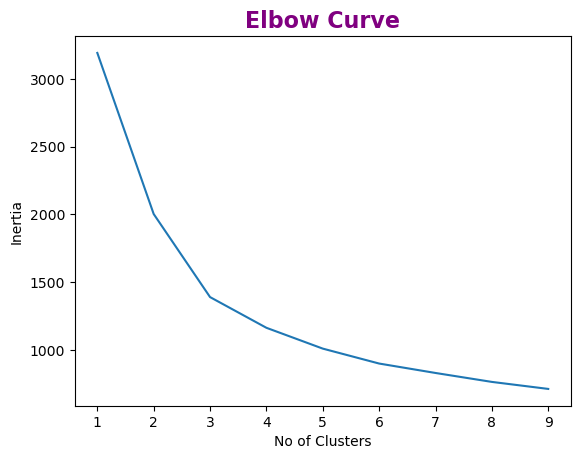

In [105]:
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i).fit(pca_kmeans)
    wcss.append(km.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('Elbow Curve',color='Purple',weight='bold',size=16)
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')

Considering 3 clusters from above curve

In [106]:
pca_km=KMeans(n_clusters=3).fit(pca_kmeans)
pca_km

KMeans(n_clusters=3)

In [107]:
pca_km_labels=pca_km.labels_
pca_km_labels=pd.DataFrame(pca_km_labels)
pca_km_labels.value_counts()

0    1269
2    1003
1     432
dtype: int64

In [108]:
pca_kmeans['pca_km_labels']=pca_km_labels
pca_kmeans

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0    -0.395833  0.129253  0.539728  0.026314  0.148981 -0.140861   
1    -1.421661  0.466386 -0.392240 -0.007011 -0.094521 -0.068530   
2    -1.174617  0.173084 -0.262895 -0.001082  0.116236 -0.121619   
3    -0.904960 -0.074561 -0.127462  0.095130  0.047747 -0.041357   
4    -1.238808  0.466069 -0.329736 -0.111862  0.071633  0.026684   
...        ...       ...       ...       ...       ...       ...   
2699  0.330991  0.083291 -0.243923  0.341807  0.029123  0.273637   
2700  1.909209  0.715630 -0.381085 -0.314408 -0.050559 -0.197224   
2701  0.699632 -0.564473 -0.137509 -0.317312 -0.141355  0.405631   
2702  0.451038  0.234412  0.321957  0.507924  0.003300  0.218555   
2703  0.703282 -0.173845 -0.050554  0.360624 -0.152119  0.213072   

      pca_km_labels  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
...             ...  
2699              0  
2700              1  
2701              0  
2702              0  
2703              0  

[2704 rows x 7 columns]

In [109]:
pca_km_silscore=silhouette_score(pca_kmeans,labels=pca_km_labels)
pca_km_silscore

0.564928272386881

## PCA KMeans with 2 clusters

In [110]:
pca_km_2_clusters=pca_data.copy()
pca_km_2=KMeans(n_clusters=2).fit(pca_km_2_clusters)
pca_km_2

KMeans(n_clusters=2)

In [111]:
pca_km_labels_2=pca_km_2.labels_
pca_km_labels_2=pd.DataFrame(pca_km_labels_2)
pca_km_labels_2.value_counts()

1    1507
0    1197
dtype: int64

In [112]:
pca_km_2_clusters['labels_km_2']=pca_km_labels_2
pca_km_2_clusters

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  labels_km_2
0    -0.395833  0.129253  0.539728  0.026314  0.148981 -0.140861            1
1    -1.421661  0.466386 -0.392240 -0.007011 -0.094521 -0.068530            1
2    -1.174617  0.173084 -0.262895 -0.001082  0.116236 -0.121619            1
3    -0.904960 -0.074561 -0.127462  0.095130  0.047747 -0.041357            1
4    -1.238808  0.466069 -0.329736 -0.111862  0.071633  0.026684            1
...        ...       ...       ...       ...       ...       ...          ...
2699  0.330991  0.083291 -0.243923  0.341807  0.029123  0.273637            0
2700  1.909209  0.715630 -0.381085 -0.314408 -0.050559 -0.197224            0
2701  0.699632 -0.564473 -0.137509 -0.317312 -0.141355  0.405631            0
2702  0.451038  0.234412  0.321957  0.507924  0.003300  0.218555            0
2703  0.703282 -0.173845 -0.050554  0.360624 -0.152119  0.213072            0

[2704 rows x 7 columns]

In [113]:
pca_km_2_score=silhouette_score(pca_km_2_clusters,labels=pca_km_labels_2)
pca_km_2_score

0.43574360530673917

## KMeans with PCA data 4 clusters

In [114]:
pca_km_4_clust=pca_data.copy()
pca_km_4_clust

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0    -0.395833  0.129253  0.539728  0.026314  0.148981 -0.140861
1    -1.421661  0.466386 -0.392240 -0.007011 -0.094521 -0.068530
2    -1.174617  0.173084 -0.262895 -0.001082  0.116236 -0.121619
3    -0.904960 -0.074561 -0.127462  0.095130  0.047747 -0.041357
4    -1.238808  0.466069 -0.329736 -0.111862  0.071633  0.026684
...        ...       ...       ...       ...       ...       ...
2699  0.330991  0.083291 -0.243923  0.341807  0.029123  0.273637
2700  1.909209  0.715630 -0.381085 -0.314408 -0.050559 -0.197224
2701  0.699632 -0.564473 -0.137509 -0.317312 -0.141355  0.405631
2702  0.451038  0.234412  0.321957  0.507924  0.003300  0.218555
2703  0.703282 -0.173845 -0.050554  0.360624 -0.152119  0.213072

[2704 rows x 6 columns]

In [115]:
pca_km_4_model=KMeans(n_clusters=4)
pca_km_4_model

KMeans(n_clusters=4)

In [116]:
pca_km_4_model=pca_km_4_model.fit(pca_km_4_clust)
pca_km_4_model

KMeans(n_clusters=4)

In [117]:
pca_km_4_model_labels_=pd.DataFrame(pca_km_4_model.labels_)
pca_km_4_model_labels_.value_counts()

2    1138
0     874
1     382
3     310
dtype: int64

In [118]:
pca_km_4_score=silhouette_score(pca_km_4_clust,labels=pca_km_4_model_labels_)
pca_km_4_score

0.30168738922428384

## DB Scan using Original Data

In [119]:
scale_data

Birth Rate  CO2 Emissions                   Country  \
0       0.282609       0.249497                   Algeria   
1       0.934783       0.027057                    Angola   
2       0.782609       0.004569                     Benin   
3       0.434783       0.012114                  Botswana   
4       0.847826       0.002934              Burkina Faso   
...          ...            ...                       ...   
2699    0.341628       0.403797  Turks and Caicos Islands   
2700    0.130435       0.403797             United States   
2701    0.173913       0.403797                   Uruguay   
2702    0.282609       0.403797             Venezuela, RB   
2703    0.086957       0.403797     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage       GDP  Health Exp % GDP  \
0                   0.565221      0.148864  0.117370          0.245455   
1                   0.565221      0.041317  0.019444          0.236364   
2                   0.565221      0.010893  0.004924          0.318182   
3                   0.565221      0.010082  0.012279          0.354545   
4                   0.565221      0.425957  0.005464          0.390909   
...                      ...           ...       ...               ...   
2699                0.565221      0.425957  0.565739          0.510632   
2700                0.057972      1.000000  1.000000          1.000000   
2701                0.086958      0.425957  0.107106          0.736364   
2702                1.000000      0.425957  0.817590          0.345455   
2703                0.565221      0.425957  0.565739          0.510632   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  ...  \
0              0.030295               0.303318        0.000000  ...   
1              0.010447               1.000000        0.000000  ...   
2              0.006790               0.834123        0.000000  ...   
3              0.078350               0.492891        0.000000  ...   
4              0.005223               0.890995        0.000000  ...   
...                 ...                    ...             ...  ...   
2699           0.417550               0.292066        0.239747  ...   
2700           1.000000               0.037915        0.800000  ...   
2701           0.682165               0.075829        0.500000  ...   
2702           0.308698               0.104265        0.500000  ...   
2703           0.417550               0.292066        0.400000  ...   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                   0.627907              0.533333            0.000000   
1                   0.069767              0.022222            0.000000   
2                   0.302326              0.222222            0.000000   
3                   0.186047              0.133333            0.051282   
4                   0.186047              0.133333            0.000000   
...                      ...                   ...                 ...   
2699                0.631611              0.521374            0.296474   
2700                0.860465              0.733333            0.512821   
2701                0.837209              0.688889            0.769231   
2702                0.790698              0.644444            0.512821   
2703                0.906977              0.733333            0.296474   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0            0.586387          0.401662        0.172662          0.646741   
1            0.937173          0.069252        0.105516          0.283705   
2            0.879581          0.119114        0.124700          0.141393   
3            0.693717          0.313019        0.124700          0.035427   
4            0.916230          0.085873        0.119904          0.236435   
...               ...               ...             ...               ...   
2699         0.484427          0.414076        0.337960          0.000276   
2700         0.204188     

In [120]:
db_data=scale_data.copy()
db_data=db_data.drop(columns='Country')
db_data

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0       0.282609       0.249497                0.565221      0.148864   
1       0.934783       0.027057                0.565221      0.041317   
2       0.782609       0.004569                0.565221      0.010893   
3       0.434783       0.012114                0.565221      0.010082   
4       0.847826       0.002934                0.565221      0.425957   
...          ...            ...                     ...           ...   
2699    0.341628       0.403797                0.565221      0.425957   
2700    0.130435       0.403797                0.057972      1.000000   
2701    0.173913       0.403797                0.086958      0.425957   
2702    0.282609       0.403797                1.000000      0.425957   
2703    0.086957       0.403797                0.565221      0.425957   

           GDP  Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
0     0.117370          0.245455           0.030295               0.303318   
1     0.019444          0.236364           0.010447               1.000000   
2     0.004924          0.318182           0.006790               0.834123   
3     0.012279          0.354545           0.078350               0.492891   
4     0.005464          0.390909           0.005223               0.890995   
...        ...               ...                ...                    ...   
2699  0.565739          0.510632           0.417550               0.292066   
2700  1.000000          1.000000           1.000000               0.037915   
2701  0.107106          0.736364           0.682165               0.075829   
2702  0.817590          0.345455           0.308698               0.104265   
2703  0.565739          0.510632           0.417550               0.292066   

      Internet Usage  Lending Interest  Life Expectancy Female  \
0           0.000000          0.385922                0.627907   
1           0.000000          1.000000                0.069767   
2           0.000000          0.619430                0.302326   
3           0.000000          0.652913                0.186047   
4           0.000000          0.619430                0.186047   
...              ...               ...                     ...   
2699        0.239747          0.619430                0.631611   
2700        0.800000          0.060680                0.860465   
2701        0.500000          0.444175                0.837209   
2702        0.500000          0.696602                0.790698   
2703        0.400000          0.619430                0.906977   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                 0.533333            0.000000         0.586387   
1                 0.022222            0.000000         0.937173   
2                 0.222222            0.000000         0.879581   
3                 0.133333            0.051282         0.693717   
4                 0.133333            0.000000         0.916230   
...                    ...                 ...              ...   
2699              0.521374            0.296474         0.484427   
2700              0.733333            0.512821         0.204188   
2701              0.688889            0.769231         0.267016   
2702              0.644444            0.512821         0.445026   
2703              0.733333            0.296474         0.230366   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.401662        0.172662          0.646741          0.563181   
1             0.069252        0.105516          0.283705          0.263617   
2             0.119114        0.124700          0.141393          0.327887   
3             0.313019        0.124700          0.035427          0.490196   
4             0.085873        0.119904          0.236435          0.104575   
...                ...             ...               ...               ...   
2699          0.414076        0.337960          

In [121]:
## Calculate Distances using Nearest Neighbours method


In [122]:
neigh=NearestNeighbors(n_neighbors=40)
neigh=neigh.fit(db_data)


In [123]:
neigh

NearestNeighbors(n_neighbors=40)

In [124]:
distances,indices=neigh.kneighbors(db_data)
distances

array([[0.00000000e+00, 6.77809452e-02, 1.21850807e-01, ...,
        5.92893587e-01, 6.06915352e-01, 6.11769279e-01],
       [0.00000000e+00, 1.01039440e-01, 2.19906627e-01, ...,
        5.56937808e-01, 5.61085437e-01, 5.61663910e-01],
       [2.98023224e-08, 5.20033427e-02, 6.37396675e-02, ...,
        4.40411383e-01, 4.41626715e-01, 4.42400637e-01],
       ...,
       [0.00000000e+00, 4.15081626e-01, 6.03224559e-01, ...,
        7.63999105e-01, 7.64749931e-01, 7.64960765e-01],
       [4.21468485e-08, 1.93654473e-01, 2.41103655e-01, ...,
        9.51129622e-01, 9.51363778e-01, 9.55723052e-01],
       [0.00000000e+00, 4.02422369e-02, 3.51144533e-01, ...,
        6.49744666e-01, 6.50896435e-01, 6.52350001e-01]])

In [125]:
distances=np.sort(distances,axis=0)

Text(0.5, 1.0, 'Elbow Curve')

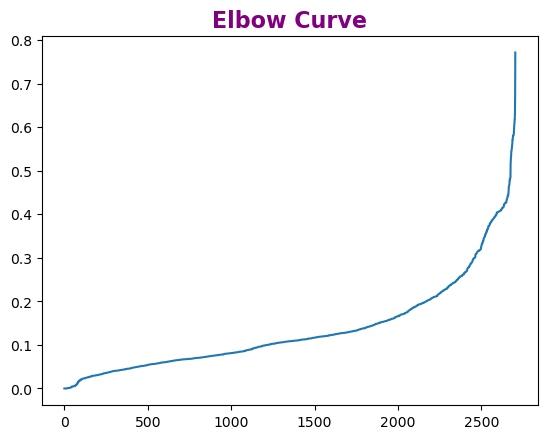

In [126]:
plt.plot(distances[:,1])
plt.title('Elbow Curve',color='Purple',size=16,weight='bold')

Considering 0.3 as radius value from above curve

In [127]:
db_scan=DBSCAN(eps=0.4,min_samples=21)
db_scan=db_scan.fit(db_data)
db_scan

DBSCAN(eps=0.4, min_samples=21)

In [128]:
db_scan_labels=db_scan.labels_
db_scan_labels

array([-1,  0,  0, ..., -1, -1, -1], dtype=int64)

In [129]:
db_data['db_labels']=pd.DataFrame(db_scan_labels)
db_data

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0       0.282609       0.249497                0.565221      0.148864   
1       0.934783       0.027057                0.565221      0.041317   
2       0.782609       0.004569                0.565221      0.010893   
3       0.434783       0.012114                0.565221      0.010082   
4       0.847826       0.002934                0.565221      0.425957   
...          ...            ...                     ...           ...   
2699    0.341628       0.403797                0.565221      0.425957   
2700    0.130435       0.403797                0.057972      1.000000   
2701    0.173913       0.403797                0.086958      0.425957   
2702    0.282609       0.403797                1.000000      0.425957   
2703    0.086957       0.403797                0.565221      0.425957   

           GDP  Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
0     0.117370          0.245455           0.030295               0.303318   
1     0.019444          0.236364           0.010447               1.000000   
2     0.004924          0.318182           0.006790               0.834123   
3     0.012279          0.354545           0.078350               0.492891   
4     0.005464          0.390909           0.005223               0.890995   
...        ...               ...                ...                    ...   
2699  0.565739          0.510632           0.417550               0.292066   
2700  1.000000          1.000000           1.000000               0.037915   
2701  0.107106          0.736364           0.682165               0.075829   
2702  0.817590          0.345455           0.308698               0.104265   
2703  0.565739          0.510632           0.417550               0.292066   

      Internet Usage  Lending Interest  ...  Life Expectancy Male  \
0           0.000000          0.385922  ...              0.533333   
1           0.000000          1.000000  ...              0.022222   
2           0.000000          0.619430  ...              0.222222   
3           0.000000          0.652913  ...              0.133333   
4           0.000000          0.619430  ...              0.133333   
...              ...               ...  ...                   ...   
2699        0.239747          0.619430  ...              0.521374   
2700        0.800000          0.060680  ...              0.733333   
2701        0.500000          0.444175  ...              0.688889   
2702        0.500000          0.696602  ...              0.644444   
2703        0.400000          0.619430  ...              0.733333   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0               0.000000         0.586387          0.401662        0.172662   
1               0.000000         0.937173          0.069252        0.105516   
2               0.000000         0.879581          0.119114        0.124700   
3               0.051282         0.693717          0.313019        0.124700   
4               0.000000         0.916230          0.085873        0.119904   
...                  ...              ...               ...             ...   
2699            0.296474         0.484427          0.414076        0.337960   
2700            0.512821         0.204188          0.534626        0.637890   
2701            0.769231         0.267016          0.457064        0.657074   
2702            0.512821         0.445026          0.493075        0.273381   
2703            0.296474         0.230366          0.462604        0.714628   

      Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
0             0.646741          0.563181         0.008394          0.016617   
1             0.283705          0.263617         0.002759          0.012566   
2             0.141393          0.327887         0.006322          0.004292   
3             0.035427          0.490196         0.018751          0.017996   
4             0.236

In [130]:
db_data['db_labels'].value_counts()


-1    2237
 0     147
 1      90
 2      70
 4      69
 3      47
 6      23
 5      21
Name: db_labels, dtype: int64

In [131]:
db_score=silhouette_score(db_data,labels=db_scan_labels)

In [132]:
pca_data

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0    -0.395833  0.129253  0.539728  0.026314  0.148981 -0.140861
1    -1.421661  0.466386 -0.392240 -0.007011 -0.094521 -0.068530
2    -1.174617  0.173084 -0.262895 -0.001082  0.116236 -0.121619
3    -0.904960 -0.074561 -0.127462  0.095130  0.047747 -0.041357
4    -1.238808  0.466069 -0.329736 -0.111862  0.071633  0.026684
...        ...       ...       ...       ...       ...       ...
2699  0.330991  0.083291 -0.243923  0.341807  0.029123  0.273637
2700  1.909209  0.715630 -0.381085 -0.314408 -0.050559 -0.197224
2701  0.699632 -0.564473 -0.137509 -0.317312 -0.141355  0.405631
2702  0.451038  0.234412  0.321957  0.507924  0.003300  0.218555
2703  0.703282 -0.173845 -0.050554  0.360624 -0.152119  0.213072

[2704 rows x 6 columns]

In [133]:
pca_db=pca_data.copy()
pca_db

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0    -0.395833  0.129253  0.539728  0.026314  0.148981 -0.140861
1    -1.421661  0.466386 -0.392240 -0.007011 -0.094521 -0.068530
2    -1.174617  0.173084 -0.262895 -0.001082  0.116236 -0.121619
3    -0.904960 -0.074561 -0.127462  0.095130  0.047747 -0.041357
4    -1.238808  0.466069 -0.329736 -0.111862  0.071633  0.026684
...        ...       ...       ...       ...       ...       ...
2699  0.330991  0.083291 -0.243923  0.341807  0.029123  0.273637
2700  1.909209  0.715630 -0.381085 -0.314408 -0.050559 -0.197224
2701  0.699632 -0.564473 -0.137509 -0.317312 -0.141355  0.405631
2702  0.451038  0.234412  0.321957  0.507924  0.003300  0.218555
2703  0.703282 -0.173845 -0.050554  0.360624 -0.152119  0.213072

[2704 rows x 6 columns]

In [134]:
neigh=NearestNeighbors(n_neighbors=12)
neigh=neigh.fit(pca_db)
neigh

NearestNeighbors(n_neighbors=12)

In [135]:
distances,indices=neigh.kneighbors(pca_db)
distances=np.sort(distances,axis=0)
distances

array([[0.00000000e+00, 1.45792112e-06, 5.56356106e-06, ...,
        8.60665400e-03, 1.54813411e-02, 1.54814865e-02],
       [0.00000000e+00, 1.45792112e-06, 7.02148219e-06, ...,
        1.01031318e-02, 1.78692767e-02, 1.78700735e-02],
       [0.00000000e+00, 5.56356106e-06, 7.02148219e-06, ...,
        1.02367821e-02, 1.78700153e-02, 1.78708158e-02],
       ...,
       [0.00000000e+00, 4.06849245e-01, 4.92008911e-01, ...,
        7.24928802e-01, 7.29409771e-01, 7.39706853e-01],
       [0.00000000e+00, 4.31203892e-01, 5.17266555e-01, ...,
        7.27573178e-01, 7.35259537e-01, 7.40996428e-01],
       [0.00000000e+00, 5.02076961e-01, 6.48268292e-01, ...,
        7.33767666e-01, 7.36517728e-01, 7.45304006e-01]])

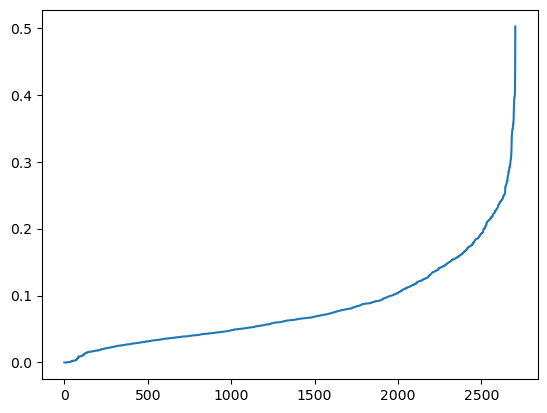

In [136]:
plt.plot(distances[:,1])

In [137]:
pca_db_scan=DBSCAN(eps=0.5,min_samples=20)
pca_db_scan=pca_db_scan.fit(pca_db)
pca_db_scan

DBSCAN(min_samples=20)

In [138]:
pca_db_labels=pca_db_scan.labels_
pca_db_labels=pd.DataFrame(pca_db_labels)

In [139]:
pca_db['pca_db_labels']=pca_db_labels
pca_db

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0    -0.395833  0.129253  0.539728  0.026314  0.148981 -0.140861   
1    -1.421661  0.466386 -0.392240 -0.007011 -0.094521 -0.068530   
2    -1.174617  0.173084 -0.262895 -0.001082  0.116236 -0.121619   
3    -0.904960 -0.074561 -0.127462  0.095130  0.047747 -0.041357   
4    -1.238808  0.466069 -0.329736 -0.111862  0.071633  0.026684   
...        ...       ...       ...       ...       ...       ...   
2699  0.330991  0.083291 -0.243923  0.341807  0.029123  0.273637   
2700  1.909209  0.715630 -0.381085 -0.314408 -0.050559 -0.197224   
2701  0.699632 -0.564473 -0.137509 -0.317312 -0.141355  0.405631   
2702  0.451038  0.234412  0.321957  0.507924  0.003300  0.218555   
2703  0.703282 -0.173845 -0.050554  0.360624 -0.152119  0.213072   

      pca_db_labels  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
2699              0  
2700              0  
2701              0  
2702              0  
2703              0  

[2704 rows x 7 columns]

Text(0.5, 1.0, 'Scatter Plot for PCA1 and PCA3')

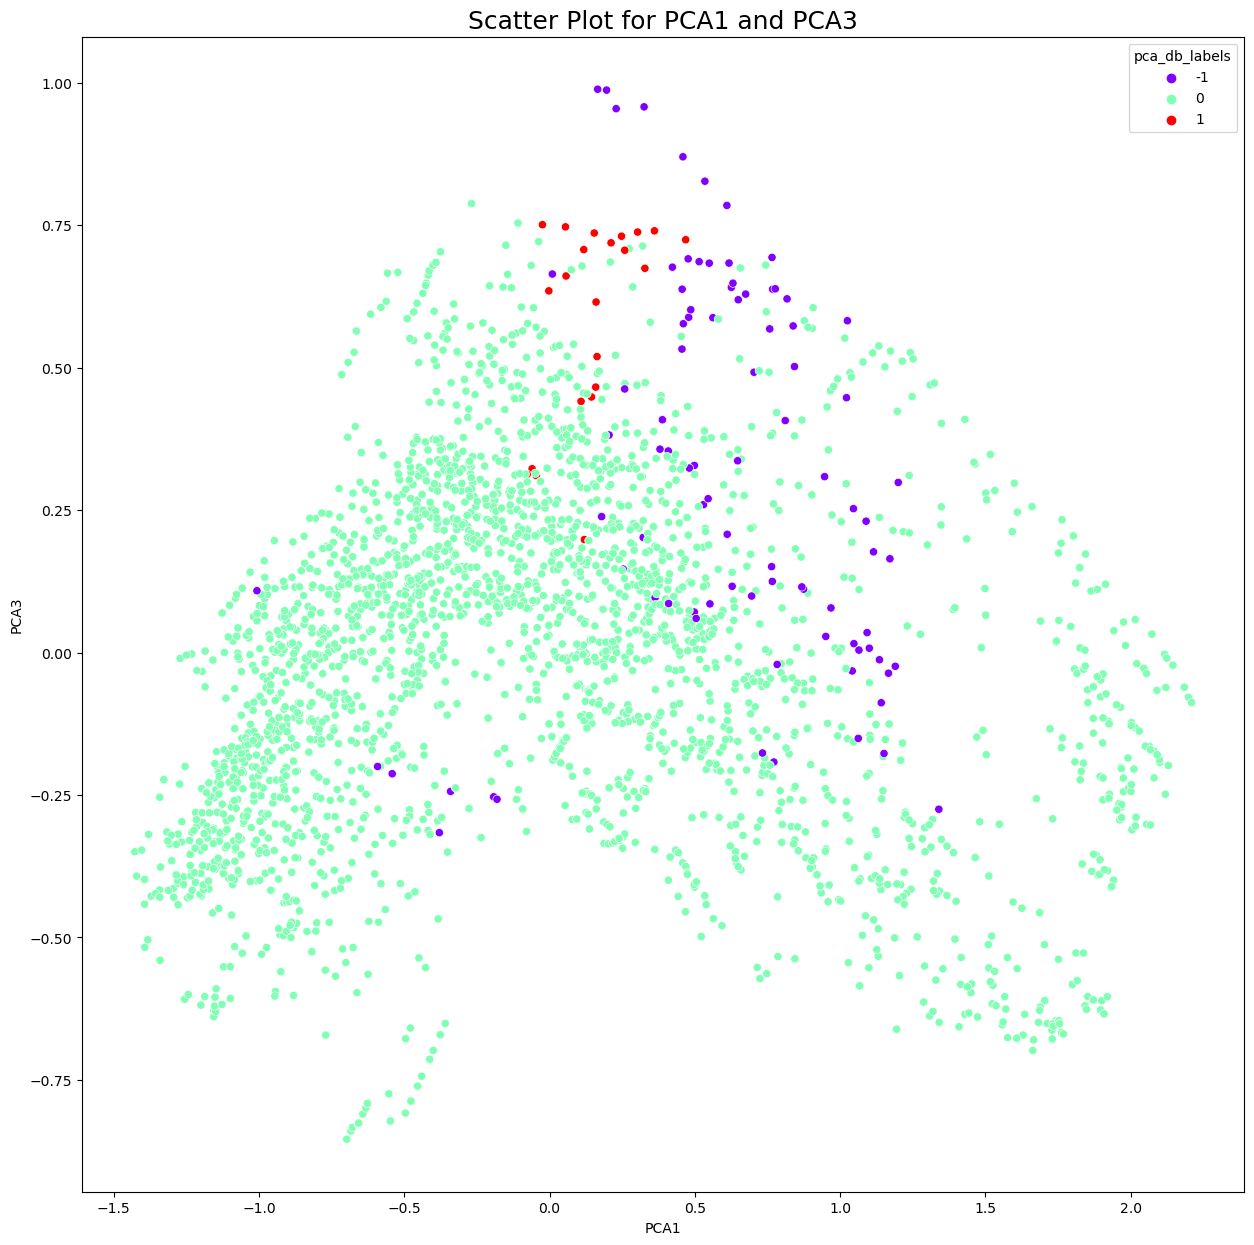

In [140]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=pca_db,x='PCA1',y='PCA3',hue='pca_db_labels',palette=plt.cm.rainbow)
plt.title('Scatter Plot for PCA1 and PCA3',size=18)

In [141]:
pca_db_labels.value_counts()

 0    2592
-1      90
 1      22
dtype: int64

In [142]:
pca_dbscore=silhouette_score(pca_db,labels=pca_db_labels)

In [143]:
scores=pd.DataFrame({'Model':['Hierarchial Clustering','Hierarchial Clustering for complete link','K Means','KMeans with 2 clusters','KMeans with 4 Clusters','DB Scan','PCA_Hierarchy','PCA_KMeans','PCA_KMeans_2 Clust','PCA_KMeans_4_Clust','PCA_DB Scan'],
                    'Silhoutte Scores':[hie_sil_score,hie_complete_score,orig_kmeans_silscore,kmeans_clust_2_score,kmeans_clust_4_score,db_score,pca_hie_silscore,pca_km_silscore,pca_km_2_score,pca_km_4_score,pca_dbscore]})
scores=scores.sort_values(by='Silhoutte Scores',ascending=False)
scores

Model  Silhoutte Scores
7                                 PCA_KMeans          0.564928
6                              PCA_Hierarchy          0.489218
3                     KMeans with 2 clusters          0.459258
1   Hierarchial Clustering for complete link          0.449470
8                         PCA_KMeans_2 Clust          0.435744
2                                    K Means          0.406920
0                     Hierarchial Clustering          0.406900
4                     KMeans with 4 Clusters          0.383515
9                         PCA_KMeans_4_Clust          0.301687
10                               PCA_DB Scan          0.290935
5                                    DB Scan          0.230808

In [144]:
final_data=global_data.copy()
final_data.head()

Birth Rate  CO2 Emissions       Country  Days to Start Business  \
0       0.020        87931.0       Algeria               39.999418   
1       0.050         9542.0        Angola               39.999418   
2       0.043         1617.0         Benin               39.999418   
3       0.027         4276.0      Botswana               39.999418   
4       0.046         1041.0  Burkina Faso               39.999418   

   Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
0  26998.000000  5.479006e+10             0.035               60.0   
1   7499.000000  9.129595e+09             0.034               22.0   
2   1983.000000  2.359122e+09             0.043               15.0   
3   1836.000000  5.788312e+09             0.047              152.0   
4  77236.840896  2.610959e+09             0.051               12.0   

   Infant Mortality Rate  Internet Usage  ...  Life Expectancy Female  \
0                  0.034             0.0  ...                    71.0   
1                  0.128             0.0  ...                    47.0   
2                  0.090             0.0  ...                    57.0   
3                  0.054             0.0  ...                    52.0   
4                  0.096             0.0  ...                    52.0   

   Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                  67.0                 0.0            0.342   
1                  44.0                 0.0            0.476   
2                  53.0                 0.0            0.454   
3                  49.0                 0.1            0.383   
4                  49.0                 0.0            0.468   

   Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.619           0.039          31719449             0.599   
1             0.499           0.025          13924930             0.324   
2             0.517           0.029           6949366             0.383   
3             0.587           0.029           1755375             0.532   
4             0.505           0.028          11607944             0.178   

   Tourism Inbound  Tourism Outbound  
0      102000000.0       193000000.0  
1       34000000.0       146000000.0  
2       77000000.0        50000000.0  
3      227000000.0       209000000.0  
4       23000000.0        30000000.0  

[5 rows x 21 columns]

In [145]:
final_data['cluster_labels']=pca_km_labels
final_data_model=final_data[:2000]
final_data_model

Birth Rate  CO2 Emissions             Country  Days to Start Business  \
0          0.020   8.793100e+04             Algeria               39.999418   
1          0.050   9.542000e+03              Angola               39.999418   
2          0.043   1.617000e+03               Benin               39.999418   
3          0.027   4.276000e+03            Botswana               39.999418   
4          0.046   1.041000e+03        Burkina Faso               39.999418   
...          ...            ...                 ...                     ...   
1995       0.011   8.030700e+04             Romania                9.000000   
1996       0.012   1.574368e+06  Russian Federation               29.000000   
1997       0.011   1.423071e+05          San Marino               39.999418   
1998       0.010   4.612700e+04              Serbia               13.000000   
1999       0.011   3.389000e+04     Slovak Republic               18.000000   

       Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
0      26998.000000  5.479006e+10             0.035               60.0   
1       7499.000000  9.129595e+09             0.034               22.0   
2       1983.000000  2.359122e+09             0.043               15.0   
3       1836.000000  5.788312e+09             0.047              152.0   
4      77236.840896  2.610959e+09             0.051               12.0   
...             ...           ...               ...                ...   
1995   34882.000000  1.643444e+11             0.056              431.0   
1996  646915.000000  1.222644e+12             0.062              525.0   
1997   77236.840896  2.638540e+11             0.051             3548.0   
1998   15177.000000  4.024947e+10             0.105              577.0   
1999   16735.000000  8.723975e+10             0.092             1475.0   

      Infant Mortality Rate  Internet Usage  ...  Life Expectancy Male  \
0                     0.034             0.0  ...                  67.0   
1                     0.128             0.0  ...                  44.0   
2                     0.090             0.0  ...                  53.0   
3                     0.054             0.0  ...                  49.0   
4                     0.096             0.0  ...                  49.0   
...                     ...             ...  ...                   ...   
1995                  0.013             0.4  ...                  70.0   
1996                  0.011             0.3  ...                  63.0   
1997                  0.003             0.5  ...                  80.0   
1998                  0.007             0.4  ...                  71.0   
1999                  0.007             0.7  ...                  71.0   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0                    0.0         0.342000          0.619000        0.039000   
1                    0.0         0.476000          0.499000        0.025000   
2                    0.0         0.454000          0.517000        0.029000   
3                    0.1         0.383000          0.587000        0.029000   
4                    0.0         0.468000          0.505000        0.028000   
...                  ...              ...               ...             ...   
1995                 1.1         0.150000          0.702000        0.148000   
1996                 1.6         0.148000          0.720000        0.133000   
1997                 1.0         0.303051          0.623481        0.073465   
1998                 1.2         0.171000          0.692000        0.137000   
1999                 1.0         0.153000          0.726000        0.121000   

      Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
0             31719449             0.599     1.020000e+08      1.930000e+08   
1             13924930             0.324     3.400000e+07      1.460000e+08   
2              6949366             0.383     7.700000e+07      5.000000e+07   
3             

In [146]:
## Saving sklearn PCA K Means models
import joblib
joblib.dump(final_data_model,'KMeans_model.py')

['KMeans_model.py']

## Training and Testing Model Accuracy using Random Forest classifier

In [147]:
pd.set_option('display.max_columns',None)
final_data_model

Birth Rate  CO2 Emissions             Country  Days to Start Business  \
0          0.020   8.793100e+04             Algeria               39.999418   
1          0.050   9.542000e+03              Angola               39.999418   
2          0.043   1.617000e+03               Benin               39.999418   
3          0.027   4.276000e+03            Botswana               39.999418   
4          0.046   1.041000e+03        Burkina Faso               39.999418   
...          ...            ...                 ...                     ...   
1995       0.011   8.030700e+04             Romania                9.000000   
1996       0.012   1.574368e+06  Russian Federation               29.000000   
1997       0.011   1.423071e+05          San Marino               39.999418   
1998       0.010   4.612700e+04              Serbia               13.000000   
1999       0.011   3.389000e+04     Slovak Republic               18.000000   

       Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
0      26998.000000  5.479006e+10             0.035               60.0   
1       7499.000000  9.129595e+09             0.034               22.0   
2       1983.000000  2.359122e+09             0.043               15.0   
3       1836.000000  5.788312e+09             0.047              152.0   
4      77236.840896  2.610959e+09             0.051               12.0   
...             ...           ...               ...                ...   
1995   34882.000000  1.643444e+11             0.056              431.0   
1996  646915.000000  1.222644e+12             0.062              525.0   
1997   77236.840896  2.638540e+11             0.051             3548.0   
1998   15177.000000  4.024947e+10             0.105              577.0   
1999   16735.000000  8.723975e+10             0.092             1475.0   

      Infant Mortality Rate  Internet Usage  Lending Interest  \
0                     0.034             0.0          0.100000   
1                     0.128             0.0          1.032000   
2                     0.090             0.0          0.148103   
3                     0.054             0.0          0.155000   
4                     0.096             0.0          0.148103   
...                     ...             ...               ...   
1995                  0.013             0.4          0.173000   
1996                  0.011             0.3          0.153000   
1997                  0.003             0.5          0.057000   
1998                  0.007             0.4          0.118000   
1999                  0.007             0.7          0.148103   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
1995                    77.0                  70.0                 1.1   
1996                    75.0                  63.0                 1.6   
1997                    86.0                  80.0                 1.0   
1998                    76.0                  71.0                 1.2   
1999                    79.0                  71.0                 1.0   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0            0.342000          0.619000        0.039000          31719449   
1            0.476000          0.499000        0.025000          13924930   
2            0.454000          0.517000        0.029000           6949366   
3            0.383000          0.587000        0.029000           1755375   
4            0.468000          0.505000        0.028000          11607944   
...               ...               

In [148]:
x=final_data_model.drop(['Country','cluster_labels'],axis=1)
y=final_data_model['cluster_labels']

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [150]:
random_forest_classifier=RandomForestClassifier(n_estimators=15,max_depth=25,random_state=42)
random_forest_classifier=random_forest_classifier.fit(x_train,y_train)
random_forest_classifier

RandomForestClassifier(max_depth=25, n_estimators=15, random_state=42)

In [151]:
y_pred=random_forest_classifier.predict(x_test)
y_pred

array([0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0,
       0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0,
       0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1,
       2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0,
       2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,

In [152]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.96

In [153]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[179,   1,   7],
       [  3,  50,   1],
       [  4,   0, 155]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Values')

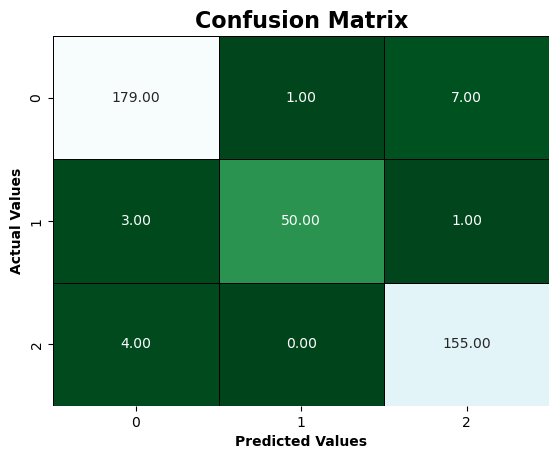

In [154]:
sns.heatmap(conf_mat,annot=True,cmap=plt.cm.BuGn_r,fmt='.2f',linecolor='black',cbar=False,linewidths=0.5)
plt.title('Confusion Matrix',weight='bold',size=16)
plt.xlabel('Predicted Values',weight='bold')
plt.ylabel('Actual Values',weight='bold')

In [155]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       187
           1       0.98      0.93      0.95        54
           2       0.95      0.97      0.96       159

    accuracy                           0.96       400
   macro avg       0.96      0.95      0.96       400
weighted avg       0.96      0.96      0.96       400



## Saving Model for Future Prediction

In [156]:
import pickle
from pickle import dump,load

In [157]:
filename='Global_Dev.sav'
with open(filename,'wb') as file:
    pickle.dump(random_forest_classifier,file)

In [158]:
with open(filename,'rb') as file:
    loaded_model=pickle.load(file)

In [159]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_test,y_test)
result

0.96

In [160]:
!pip install streamlit

In [161]:
final_data.tail(40)

Birth Rate  CO2 Emissions                         Country  \
2664    0.024000  142307.107765                          Belize   
2665    0.012000  142307.107765                         Bermuda   
2666    0.026000  142307.107765                         Bolivia   
2667    0.015000  142307.107765                          Brazil   
2668    0.011000  142307.107765                          Canada   
2669    0.013000  142307.107765                  Cayman Islands   
2670    0.014000  142307.107765                           Chile   
2671    0.019000  142307.107765                        Colombia   
2672    0.015000  142307.107765                      Costa Rica   
2673    0.010000  142307.107765                            Cuba   
2674    0.013000  142307.107765                         Curacao   
2675    0.022715  142307.107765                        Dominica   
2676    0.021000  142307.107765              Dominican Republic   
2677    0.021000  142307.107765                         Ecuador   
2678    0.020000  142307.107765                     El Salvador   
2679    0.014000  142307.107765                       Greenland   
2680    0.019000  142307.107765                         Grenada   
2681    0.031000  142307.107765                       Guatemala   
2682    0.021000  142307.107765                          Guyana   
2683    0.026000  142307.107765                           Haiti   
2684    0.026000  142307.107765                        Honduras   
2685    0.015000  142307.107765                         Jamaica   
2686    0.019000  142307.107765                          Mexico   
2687    0.023000  142307.107765                       Nicaragua   
2688    0.020000  142307.107765                          Panama   
2689    0.024000  142307.107765                        Paraguay   
2690    0.020000  142307.107765                            Peru   
2691    0.011000  142307.107765                     Puerto Rico   
2692    0.022715  142307.107765       Sint Maarten (Dutch part)   
2693    0.022715  142307.107765             St. Kitts and Nevis   
2694    0.016000  142307.107765                       St. Lucia   
2695    0.016000  142307.107765        St. Martin (French part)   
2696    0.017000  142307.107765  St. Vincent and the Grenadines   
2697    0.018000  142307.107765                        Suriname   
2698    0.015000  142307.107765             Trinidad and Tobago   
2699    0.022715  142307.107765        Turks and Caicos Islands   
2700    0.013000  142307.107765                   United States   
2701    0.015000  142307.107765                         Uruguay   
2702    0.020000  142307.107765                   Venezuela, RB   
2703    0.011000  142307.107765           Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
2664               44.000000  7.723684e+04  1.572500e+09           0.05800   
2665               39.999418  7.723684e+04  5.473536e+09           0.06417   
2666               49.000000  7.723684e+04  2.703511e+10           0.05800   
2667              119.000000  7.723684e+04  2.248781e+12           0.09300   
2668                5.000000  2.526510e+05  1.821445e+12           0.10900   
2669               39.999418  7.723684e+04  2.638540e+11           0.06417   
2670                8.000000  3.272000e+04  2.662593e+11           0.07200   
2671               15.000000  7.723684e+04  3.703281e+11           0.06800   
2672               60.000000  7.723684e+04  4.537479e+10           0.10100   
2673               39.999418  7.723684e+04  2.638540e+11           0.08600   
2674               39.999418  7.723684e+04  2.638540e+11           0.06417   
2675               12.000000  7.723684e+04  4.955556e+08           0.05900   
2676               19.000000  7.723684e+04  5.892050e+10           0.05400   
2677               56.000000  7.723684e+04  8.403986e+10           0.06400   
2678               17.000000  7.723684e+04  2.381360e+10           0.06700   
2679      